Python Libraries For Project Use

In [956]:
import numpy as np 
import pandas as pd 

import math
import statistics

from pandas.plotting import scatter_matrix, parallel_coordinates

from sklearn import preprocessing

import scipy.stats
from scipy.stats import anderson
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

%matplotlib inline

I. Load & Perform A General Evaluation Of The Titanic Dataset

In [957]:
# Load 'titanic' dataset.
titanic_df = pd.read_csv('titanic.csv')

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [958]:
# View 'titanic' dataset initial records.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [959]:
# Generate 'titanic' dataset dimensions.
titanic_df.shape

(1309, 12)

In [960]:
# Generate 'titanic' dataset data types.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [961]:
# View 'titanic' dataset descriptive statistics.
titanic_df.describe().map('{:,.3f}'.format)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,"1,309.000",891.000,"1,309.000","1,046.000","1,309.000","1,309.000","1,308.000"
mean,655.000,0.384,2.295,29.881,0.499,0.385,33.295
std,378.020,0.487,0.838,14.413,1.042,0.866,51.759
min,1.000,0.000,1.000,0.170,0.000,0.000,0.000
25%,328.000,0.000,2.000,21.000,0.000,0.000,7.896
50%,655.000,0.000,3.000,28.000,0.000,0.000,14.454
75%,982.000,1.000,3.000,39.000,1.000,0.000,31.275
max,"1,309.000",1.000,3.000,80.000,8.000,9.000,512.329


In [962]:
# Assess missing values per feature in 'titanic' dataset.
titanic_missing = titanic_df.isna().sum()
titanic_missing

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

II. Perform An Outcome & Potential Explanatory Variable Evaluation 

In [963]:
# Evaluate the 'Survived' binary outcome variable for the training dataset.
titanic_df['Survived'].value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

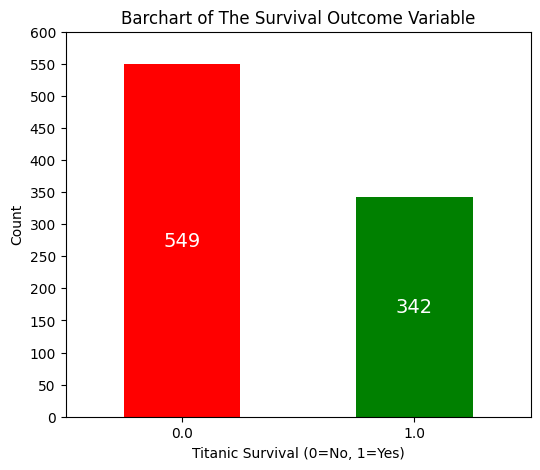

In [964]:
# Barchart for the 'Survived' binary variable (0 = No, 1 = Yes) for the training dataset.
dfg = titanic_df['Survived'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of The Survival Outcome Variable', ylabel='Count', xlabel='Titanic Survival (0=No, 1=Yes)', color= ['r','g'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='w', fontsize=14)
plt.yticks(np.arange(0,601,step=50)) 
plt.show()

In [965]:
# Evaluate the 'Pclass' numeric categorical variable distribution.
titanic_df['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

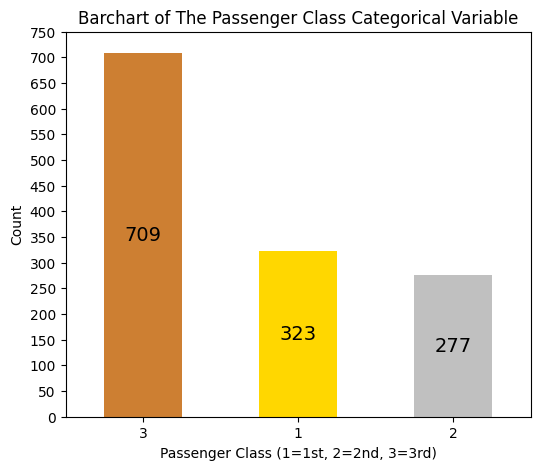

In [966]:
# Barchart for the 'Pclass' numeric categorical variable (1=1st, 2=2nd, 3=3rd) distribution.
dfg = titanic_df['Pclass'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of The Passenger Class Categorical Variable', ylabel='Count', xlabel='Passenger Class (1=1st, 2=2nd, 3=3rd)', color= ['#CD7F32','gold','silver'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='black', fontsize=14)
plt.yticks(np.arange(0,751,step=50)) 
plt.show()

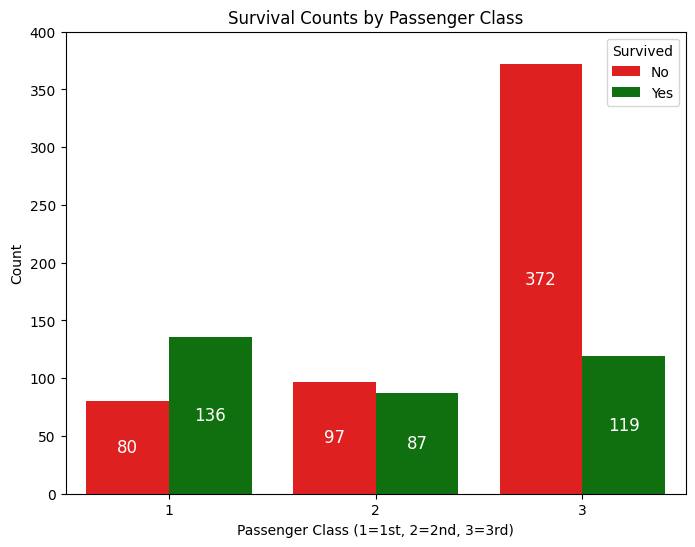

In [967]:
# Bar chart for 'Pclass' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Pclass', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height / 2,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="white", fontsize=12)

plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Class (1=1st, 2=2nd, 3=3rd)')
plt.ylabel('Count')
plt.yticks(np.arange(0,401,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [ ]:
# Create a 'Title' variable from the 'Name' character variable.
titanic_df['Title'] = titanic_df['Name'].str.extract(' ([A-Za-z]+)\.')

# Create a 'Surname' variable from the 'Name' character variable for family grouping.
titanic_df['Surname'] = titanic_df['Name'].str.split(', ').str[0]

In [969]:
# Evaluate the 'Title' string character variable distribution.
titanic_df['Title'].value_counts()

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

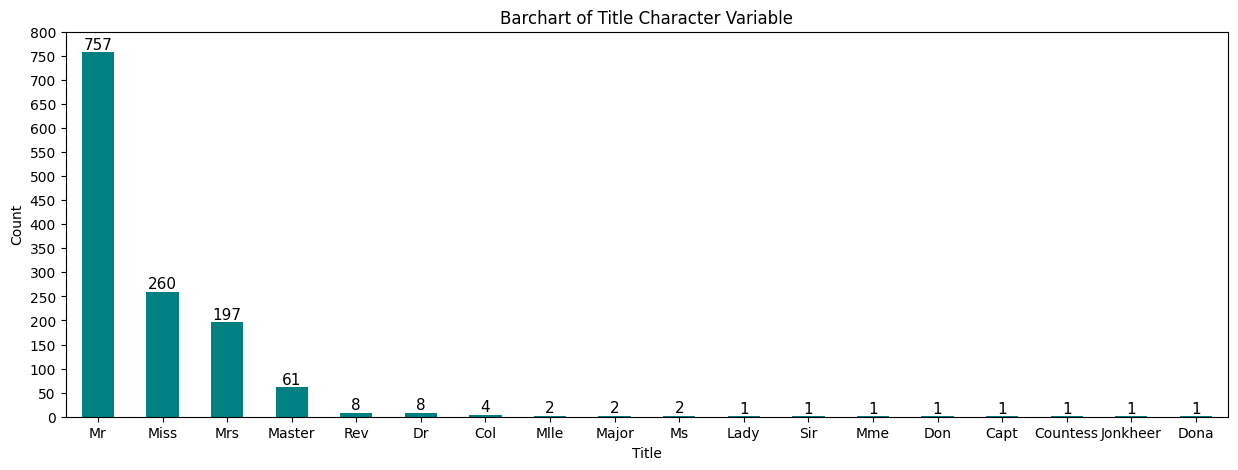

In [970]:
# Barchart for the 'Title' string character variable distribution.
dfg = titanic_df['Title'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of Title Character Variable', ylabel='Count', xlabel='Title', color= ['teal'], rot=0, figsize=(15,5))
ax.bar_label(ax.containers[0], color='black', fontsize=11)
plt.yticks(np.arange(0,801,step=50)) 
plt.show()

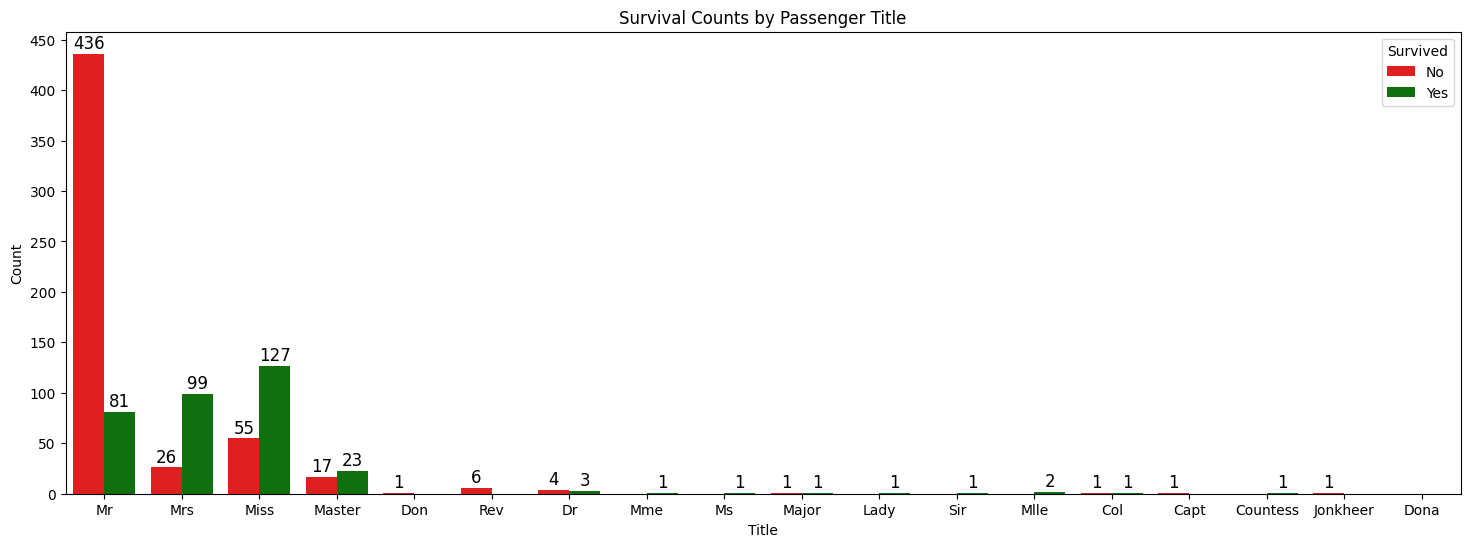

In [971]:
# Bar chart for 'Title' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(18, 6))
ax = sns.countplot(x='Title', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 10,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="black", fontsize=12)

plt.title('Survival Counts by Passenger Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.yticks(np.arange(0,451,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [972]:
# Evaluate the 'Surname' string character variable distribution.
titanic_df['Surname'].value_counts()

Surname
Andersson                 11
Sage                      11
Goodwin                    8
Asplund                    8
Davies                     7
Brown                      6
Panula                     6
Skoog                      6
Carter                     6
Rice                       6
Smith                      6
Fortune                    6
Johnson                    6
Ford                       6
Lefebre                    5
Williams                   5
Ryerson                    5
Palsson                    5
Kelly                      5
Thomas                     5
Baclini                    4
Hansen                     4
Hart                       4
Laroche                    4
Harris                     4
Elias                      4
West                       4
Johnston                   4
Ware                       4
Harper                     4
Boulos                     4
Gustafsson                 4
Johansson                  4
Goldsmith                  4
Dean  

In [973]:
# Create FamilyID (Surname + Ticket) concatenated variable.
titanic_df['FamilyID'] = titanic_df['Surname'] + '_' + titanic_df['Ticket']

titanic_df['FamilyID'].head()

0              Braund_A/5 21171
1              Cumings_PC 17599
2    Heikkinen_STON/O2. 3101282
3               Futrelle_113803
4                  Allen_373450
Name: FamilyID, dtype: object

In [974]:
# Evaluate the 'Sex' character categorical variable distribution.
titanic_df['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

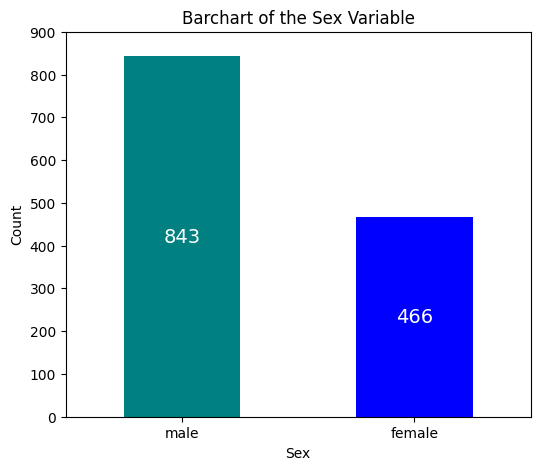

In [975]:
# Barchart for the 'Sex' numeric variable distribution.
dfg = titanic_df['Sex'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Sex Variable', ylabel='Count', xlabel='Sex', color= ['teal','b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=14)
plt.yticks(np.arange(0,901,step=100)) 
plt.show()

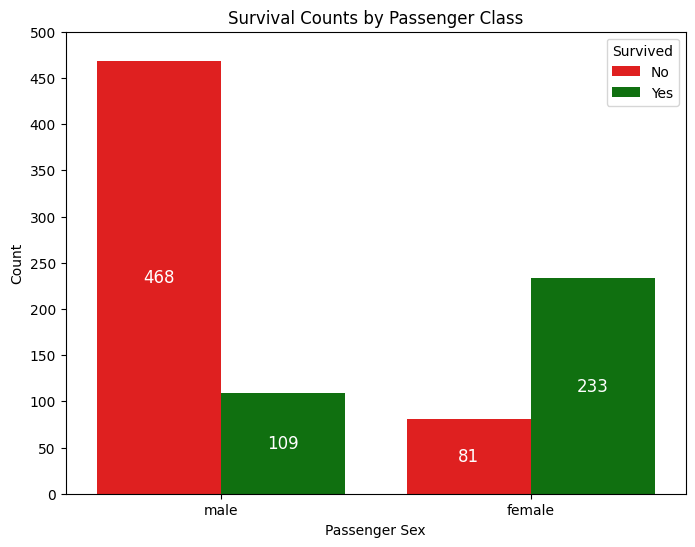

In [976]:
# Bar chart for 'Sex' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sex', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height / 2,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="white", fontsize=12)

plt.title('Survival Counts by Passenger Class')
plt.xlabel('Passenger Sex')
plt.ylabel('Count')
plt.yticks(np.arange(0,501,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

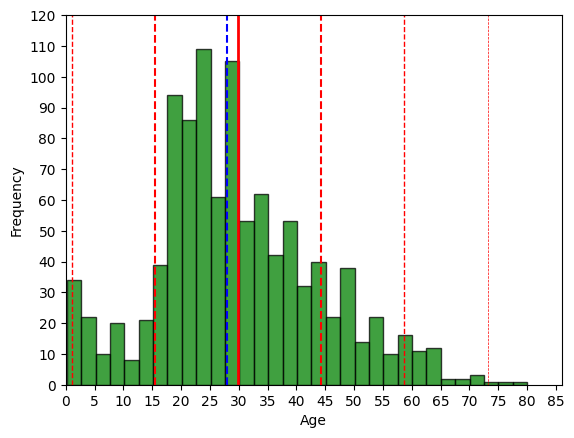

In [977]:
# Create temporary data with NaN values removed for 'Age' numeric variable charting.
agetemp_df = titanic_df.dropna(subset=['Age'])

# Histogram for the 'Age' numerical variable.
plt.hist(agetemp_df['Age'], bins = 32, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(0, 86)
plt.xticks(np.arange(0,86,step=5))
plt.yticks(np.arange(0,121,step=10))

mean_value = agetemp_df['Age'].mean()
median_value = agetemp_df['Age'].median()
std_value = agetemp_df['Age'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

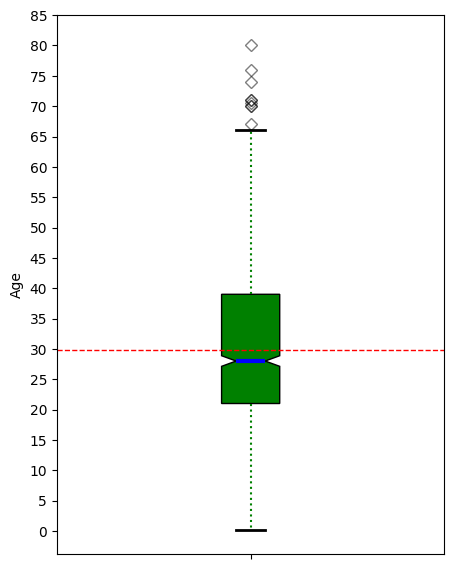

In [978]:
# Boxplot for the 'Age' numeric variable distribution.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(agetemp_df['Age'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Age')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,86,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [979]:
# 'Age' Anderson-Darling Normality Test
result = anderson(agetemp_df['Age'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 7.130
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.784, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.088, data does not look normal (reject H0)


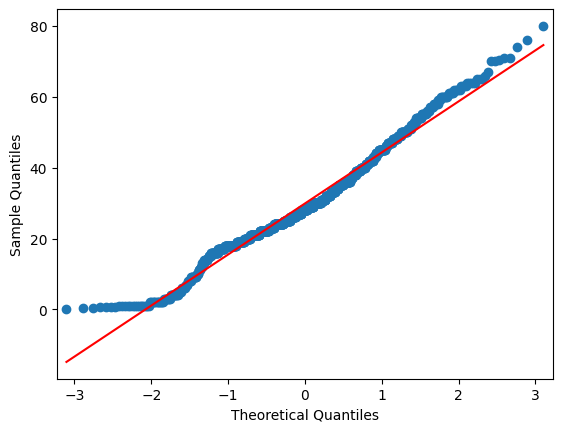

In [980]:
# 'Age' QQ plot
qqplot(agetemp_df['Age'], line='s')
plt.show()

In [981]:
# Evaluate skewness of the distribution for the 'Age' numeric variable.
age_skew = agetemp_df['Age'].skew()

print(f"Age distribution has a skewness of{age_skew: .3f}")

Age distribution has a skewness of 0.408


In [982]:
# Evaluate the 'SibSp' binary outcome variable distribution.
titanic_df['SibSp'].value_counts()

SibSp
0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: count, dtype: int64

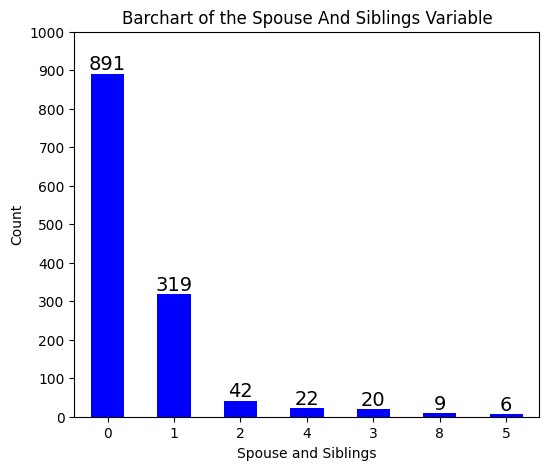

In [983]:
# Barchart for the 'SibSp' numeric variable distribution.
dfg = titanic_df['SibSp'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Spouse And Siblings Variable', ylabel='Count', xlabel='Spouse and Siblings', color= ['b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,1001,step=100)) 
plt.show()

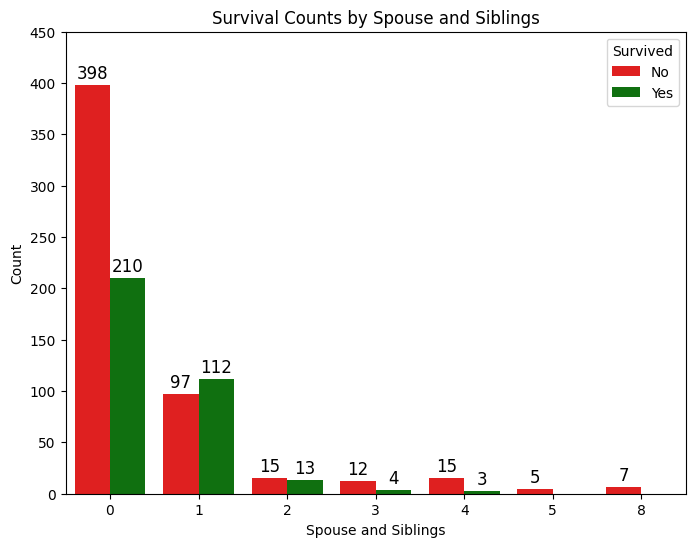

In [984]:
# Bar chart for 'SibSp' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='SibSp', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Spouse and Siblings')
plt.xlabel('Spouse and Siblings')
plt.ylabel('Count')
plt.yticks(np.arange(0,451,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [985]:
# Evaluate the 'Parch' numeric variable distribution.
titanic_df['Parch'].value_counts()

Parch
0    1002
1     170
2     113
3       8
5       6
4       6
6       2
9       2
Name: count, dtype: int64

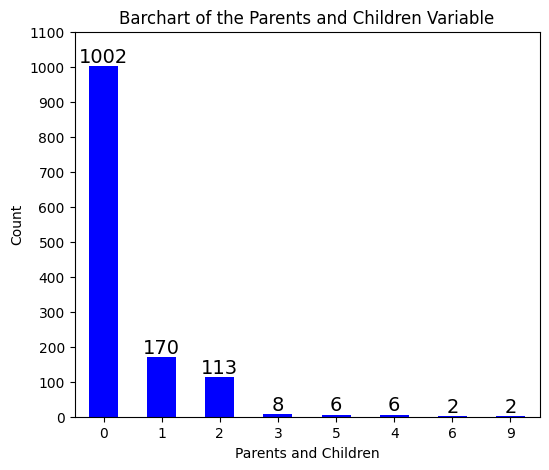

In [986]:
# Barchart for the 'Parch' numeric variable distribution.
dfg = titanic_df['Parch'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Parents and Children Variable', ylabel='Count', xlabel='Parents and Children', color= ['b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,1101,step=100)) 
plt.show()

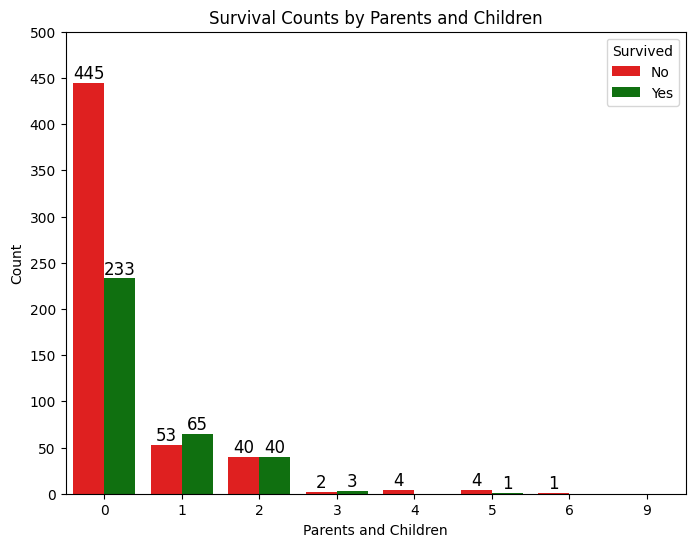

In [987]:
# Bar chart for 'Parch' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Parch', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Parents and Children')
plt.xlabel('Parents and Children')
plt.ylabel('Count')
plt.yticks(np.arange(0,501,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [988]:
# Create 'FamilySize' variable by summing 'SibSp' and "Parch' variables.
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch']

In [989]:
# Evaluate the 'FamilySize' numeric variable distribution.
titanic_df['FamilySize'].value_counts()

FamilySize
0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: count, dtype: int64

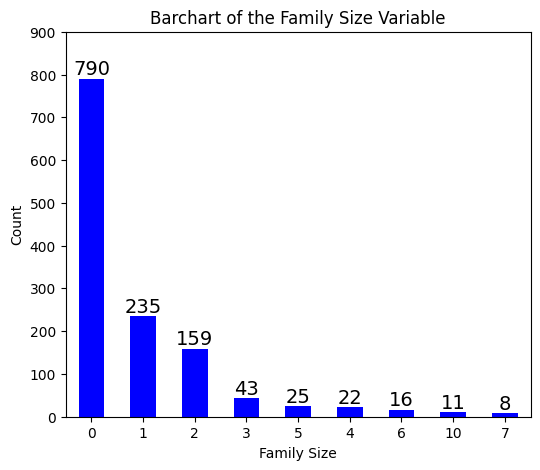

In [990]:
# Barchart for the 'FamilySize' numeric variable distribution.
dfg = titanic_df['FamilySize'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Family Size Variable', ylabel='Count', xlabel='Family Size', color= ['b'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,901,step=100)) 
plt.show()

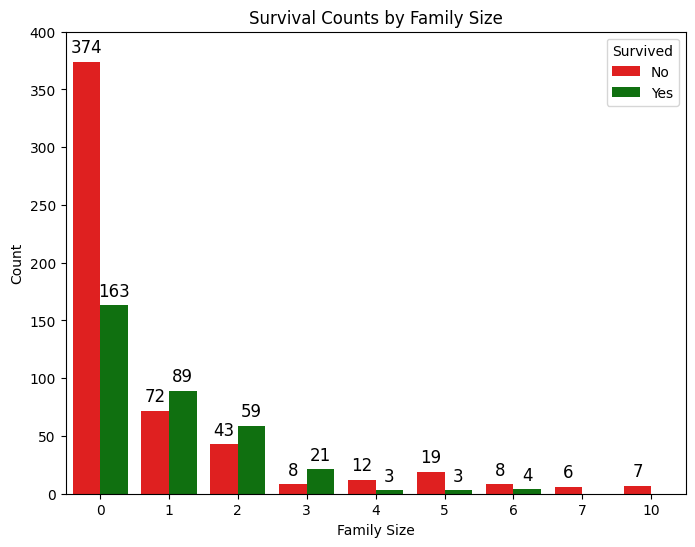

In [991]:
# Bar chart for 'FamilySize' distibution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='FamilySize', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.yticks(np.arange(0,401,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [992]:
# Step 1: Function to parse Ticket into Prefix and Number.
def parse_ticket(ticket):
    # Split on the last space to separate prefix and number
    parts = ticket.rsplit(' ', 1)  # rsplit splits from the right, max 1 split
   
    if len(parts) == 2:
        # If there's a prefix and number
        prefix, number = parts
        # Clean up prefix (remove trailing dots or spaces)
        # prefix = prefix.strip().rstrip('.')
        return prefix, number
    else:
        # If there's no space, it's just a number
        return None, ticket

# Apply the parsing function and create new columns.
titanic_df[['TicketPrefix', 'TicketNumber']] = pd.DataFrame(
    titanic_df['Ticket'].apply(parse_ticket).tolist(),
    index=titanic_df.index
)

# Step 2: Update TicketPrefix to include "LINE" for 3rd-class zero-fare tickets
# Identify 3rd-class passengers with Fare = 0 and assign "LINE" as TicketPrefix
zero_fare_3rd = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Fare'] == 0)]
titanic_df.loc[zero_fare_3rd.index, 'TicketPrefix'] = 'LINE'

# Step 3: Verify the updated TicketPrefix
print("\nUpdated TicketPrefix (first 20 rows):")
titanic_df[['Ticket', 'TicketPrefix', 'TicketNumber']].head(20)


Updated TicketPrefix (first 20 rows):


,Ticket,TicketPrefix,TicketNumber
0,A/5 21171,A/5,21171
1,PC 17599,PC,17599
2,STON/O2. 3101282,STON/O2.,3101282
3,113803,None,113803
4,373450,None,373450
5,330877,None,330877
6,17463,None,17463
7,349909,None,349909
8,347742,None,347742
9,237736,None,237736


In [993]:
# Evaluate the 'TicketPrefix' character variable distribution.
titanic_df['TicketPrefix'].value_counts()

TicketPrefix
PC             92
C.A.           46
SOTON/O.Q.     16
W./C.          14
STON/O 2.      14
A/5            12
CA.            12
SC/PARIS       11
CA             10
A/5.           10
F.C.C.          9
SOTON/OQ        8
C               8
S.O.C.          7
STON/O2.        7
S.O./P.P.       7
A/4             6
SC/Paris        5
PP              4
LINE            4
SC/AH           4
S.C./PARIS      3
SOTON/O2        3
A.5.            3
A./5.           3
F.C.            3
A/4.            3
SC              2
P/PP            2
WE/P            2
W.E.P.          2
C.A./SOTON      1
SC/A.3          1
STON/OQ.        1
AQ/4            1
A. 2.           1
LP              1
SC/A4           1
SW/PP           1
S.W./PP         1
SC/AH Basle     1
A/S             1
SCO/W           1
S.C./A.4.       1
W/C             1
Fa              1
S.O.P.          1
A4.             1
SO/C            1
S.P.            1
AQ/3.           1
Name: count, dtype: int64

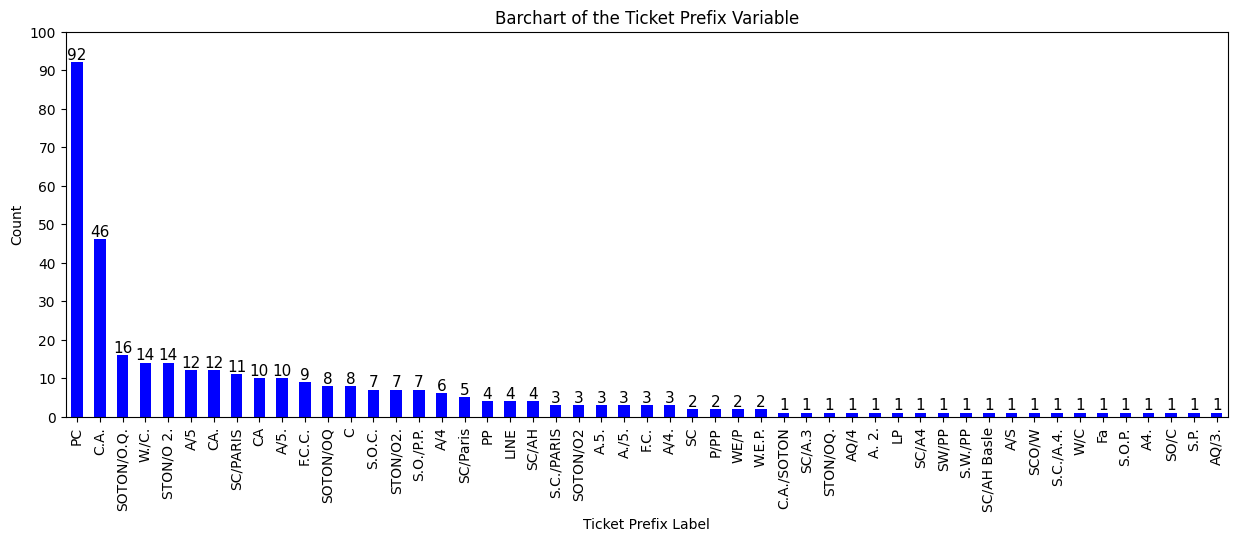

In [994]:
# Barchart for the 'TicketPrefix' character variable distribution.
dfg = titanic_df['TicketPrefix'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Ticket Prefix Variable', ylabel='Count', xlabel='Ticket Prefix Label', color= ['b'], rot=0, figsize=(15,5))
ax.bar_label(ax.containers[0], color='black', fontsize=11)
plt.xticks(rotation=90)
plt.yticks(np.arange(0,101,step=10)) 
plt.show()

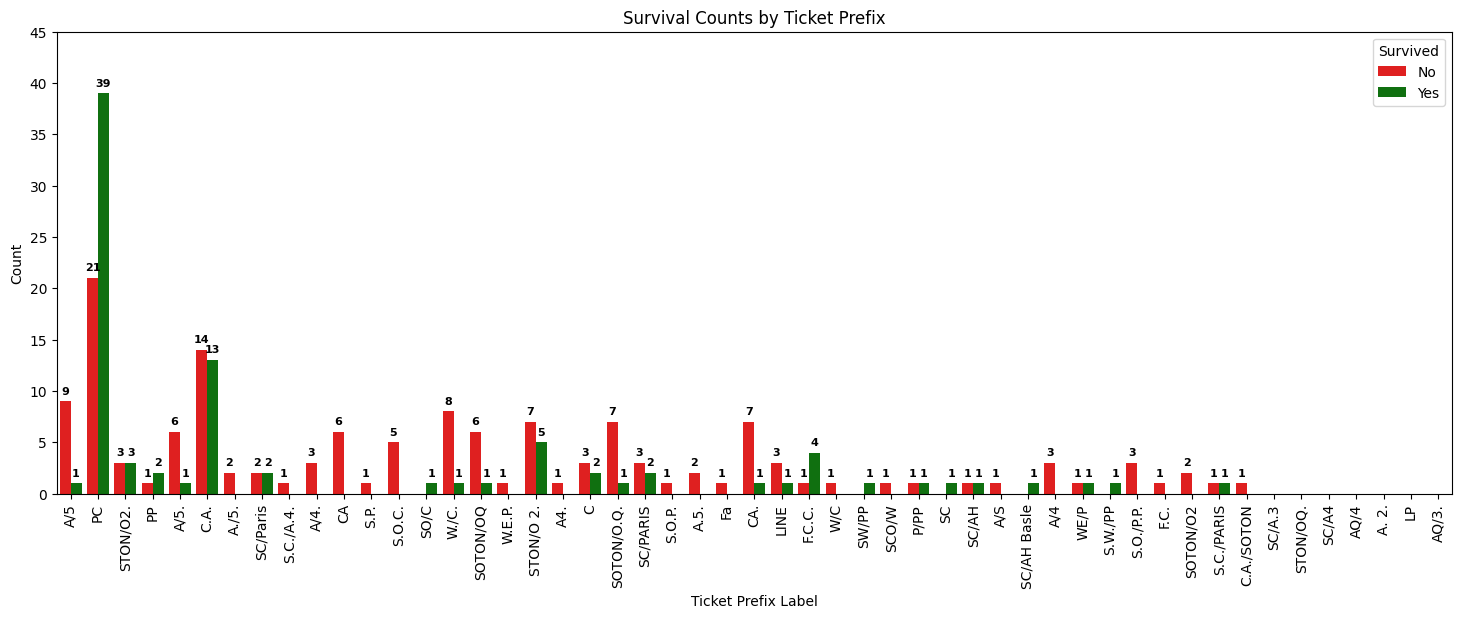

In [995]:
# Bar chart for 'TicketPrefix' with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(18, 6))
ax = sns.countplot(x='TicketPrefix', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 1.5,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=8, fontweight='bold')

plt.title('Survival Counts by Ticket Prefix')
plt.xlabel('Ticket Prefix Label')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.yticks(np.arange(0,46,step=5))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

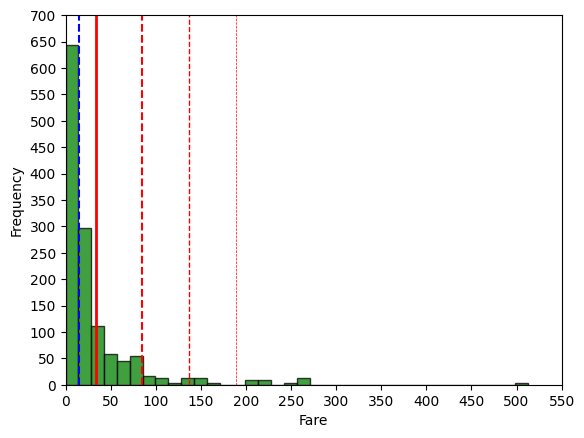

In [996]:
# Create temporary data with NaN values removed for 'Fare' numeric variable charting.
faretemp_df = titanic_df.dropna(subset=['Fare'])

# Histogram for the 'Fare' numerical variable.
plt.hist(faretemp_df['Fare'], bins = 36, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.xlim(0, 86)
plt.xticks(np.arange(0,551,step=50))
plt.yticks(np.arange(0,701,step=50))

mean_value = faretemp_df['Fare'].mean()
median_value = faretemp_df['Fare'].median()
std_value = faretemp_df['Fare'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

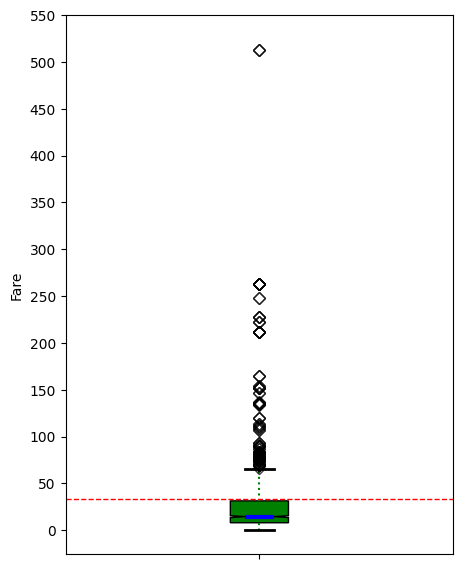

In [997]:
# Boxplot for the 'Fare' numeric variable distribution.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(faretemp_df['Fare'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Fare')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,551,step=50)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [998]:
# 'Fare' Anderson-Darling Normality Test
result = anderson(faretemp_df['Fare'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 186.890
15.000: 0.574, data does not look normal (reject H0)
10.000: 0.654, data does not look normal (reject H0)
5.000: 0.785, data does not look normal (reject H0)
2.500: 0.915, data does not look normal (reject H0)
1.000: 1.089, data does not look normal (reject H0)


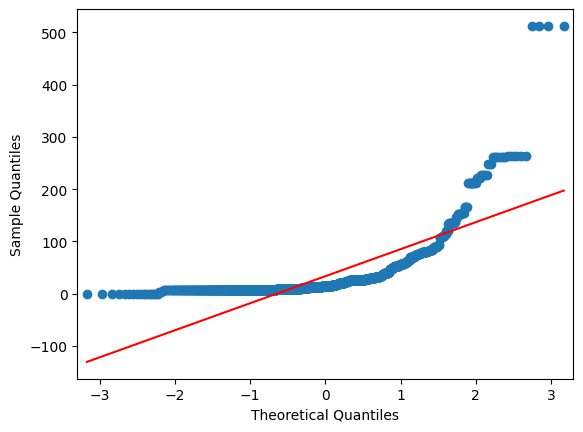

In [999]:
# 'Fare' QQ plot
qqplot(faretemp_df['Fare'], line='s')
plt.show()

In [1000]:
# Evaluate skewness of the distribution for the 'Fare' numeric variable.
fare_skew = faretemp_df['Fare'].skew()

print(f"Fare distribution has a skewness of{fare_skew: .3f}")

Fare distribution has a skewness of 4.368


In [1001]:
# Verify zero fares.
print("\nPassengers with Fare = 0:")
titanic_df[titanic_df['Fare'] == 0][['PassengerId', 'Pclass', 'Name', 'Fare', 'Embarked', 'TicketPrefix']]


Passengers with Fare = 0:


,PassengerId,Pclass,Name,Fare,Embarked,TicketPrefix
179,180,3,"Leonard, Mr. Lionel",0.0,S,LINE
263,264,1,"Harrison, Mr. William",0.0,S,None
271,272,3,"Tornquist, Mr. William Henry",0.0,S,LINE
277,278,2,"Parkes, Mr. Francis ""Frank""",0.0,S,None
302,303,3,"Johnson, Mr. William Cahoone Jr",0.0,S,LINE
413,414,2,"Cunningham, Mr. Alfred Fleming",0.0,S,None
466,467,2,"Campbell, Mr. William",0.0,S,None
481,482,2,"Frost, Mr. Anthony Wood ""Archie""",0.0,S,None
597,598,3,"Johnson, Mr. Alfred",0.0,S,LINE
633,634,1,"Parr, Mr. William Henry Marsh",0.0,S,None


In [1002]:
# Function to create 'Deck' variable from 'Cabin' variable.
def extract_deck(cabin):
    if pd.isna(cabin):  # Handle NaN values
        return "Lower"
    # Split on space and take the first cabin (if multiple)
    first_cabin = cabin.split()[0]
    # Take the first letter as the deck
    return first_cabin[0]

# Create the Deck variable
titanic_df['Deck'] = titanic_df['Cabin'].apply(extract_deck)

# Evaluate the 'TicketPrefix' character variable distribution.
titanic_df['Deck'].value_counts()

Deck
Lower    1014
C          94
B          65
D          46
E          41
A          22
F          21
G           5
T           1
Name: count, dtype: int64

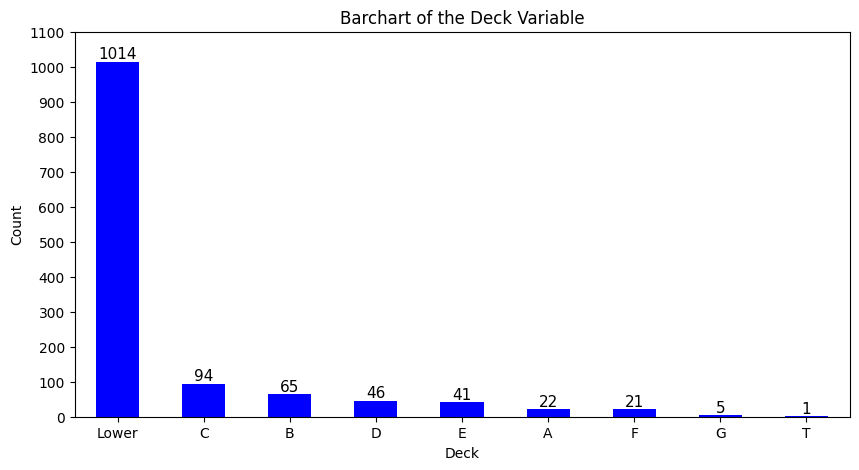

In [1003]:
# Barchart for the 'Deck' character variable distribution.
dfg = titanic_df['Deck'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Deck Variable', ylabel='Count', xlabel='Deck', color= ['b'], rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=11)
plt.yticks(np.arange(0,1101,step=100)) 
plt.show()

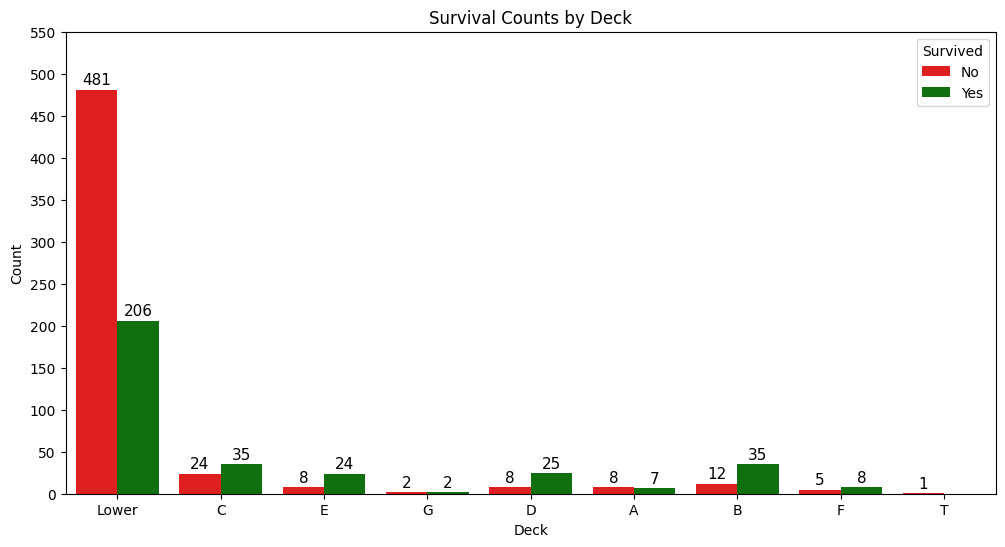

In [1004]:
# Bar chart for 'Deck' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Deck', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 20,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=11)

plt.title('Survival Counts by Deck')
plt.xlabel('Deck')
plt.ylabel('Count')
plt.yticks(np.arange(0,551,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

In [1005]:
# Evaluate the 'Embarked' categorical variable.
titanic_df['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

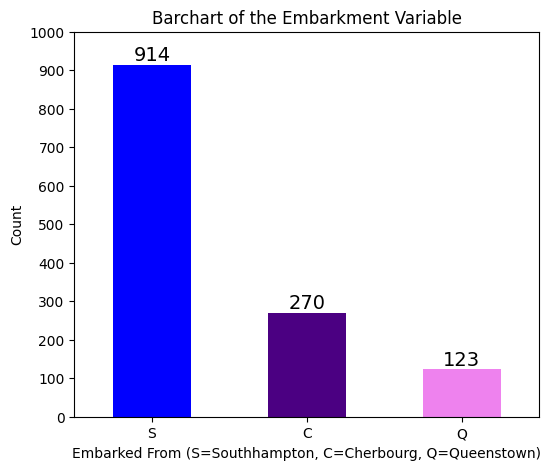

In [1006]:
# Barchart for the 'Embarked' categorical variable.
dfg = titanic_df['Embarked'].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Embarkment Variable', ylabel='Count', xlabel='Embarked From (S=Southhampton, C=Cherbourg, Q=Queenstown)', color= ['blue', 'indigo', 'violet'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14)
plt.yticks(np.arange(0,1001,step=100)) 
plt.show()

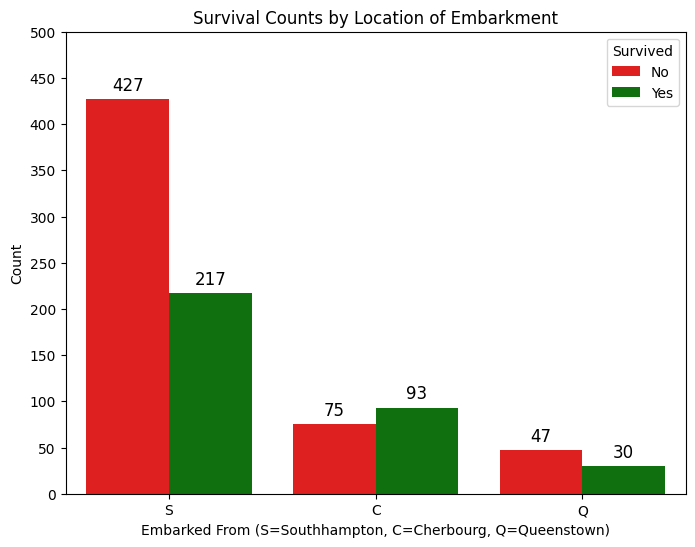

In [1007]:
# Bar chart for 'Embarked' with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Embarked', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'})

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width()/2, height + 25,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="top", color="black", fontsize=12)

plt.title('Survival Counts by Location of Embarkment')
plt.xlabel('Embarked From (S=Southhampton, C=Cherbourg, Q=Queenstown)')
plt.ylabel('Count')
plt.yticks(np.arange(0,501,step=50))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

III. Perform Imputation For The Fare (1), Embarked (2), Deck (1014), and Age (263) Variables.

A. Fare And Embarked Variable Imputation

In [1008]:
# Step 1: Analyze missing values
print("Missing values before cleaning:")
print(titanic_df[['Fare', 'Embarked']].isnull().sum())

# Step 2: Clean Fare
# Identify Storey in test set (assuming test set starts at index 891)
test_df = titanic_df[titanic_df.index >= 891]  # Adjust index based on your dataset split
storey_row = test_df[(test_df['Name'].str.contains('Storey', case=True, na=False)) &
                     (test_df['Pclass'] == 3) &
                     (test_df['Embarked'] == 'S') &
                     (test_df['Fare'].isnull())]

if not storey_row.empty:
    median_fare_3rd_s = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'S')]['Fare'].median()
    titanic_df.loc[storey_row.index, 'Fare'] = median_fare_3rd_s
    print(f"\nImputed Fare for Storey: {median_fare_3rd_s} at index {storey_row.index[0]}")

# Step 3: Verify missing Embarked and original distribution
missing_embarked = titanic_df[titanic_df['Embarked'].isnull()]
print("Passengers with missing Embarked before imputation:")
print(missing_embarked[['PassengerId', 'Name', 'Pclass', 'Cabin', 'Ticket', 'Fare', 'Survived']])

print("\nOriginal Embarked distribution:")
print(titanic_df['Embarked'].value_counts())

# Step 4: Impute Embarked for Icard and Stone using PassengerId
titanic_df.loc[titanic_df['PassengerId'] == 62, 'Embarked'] = 'S'  # Icard, Southampton
titanic_df.loc[titanic_df['PassengerId'] == 830, 'Embarked'] = 'S'  # Stone, Southampton

# Step 5: Verify imputation
print("\nMissing Embarked after imputation:")
print(titanic_df['Embarked'].isnull().sum())
print("\nUpdated Embarked distribution:")
print(titanic_df['Embarked'].value_counts())

# Step 6: Confirm affected rows
affected_rows = titanic_df[titanic_df['PassengerId'].isin([62, 830])]
print("\nVerification of Icard (62) and Stone (830) after imputation:")
print(affected_rows[['PassengerId', 'Name', 'Embarked']])

Missing values before cleaning:
Fare        1
Embarked    2
dtype: int64

Imputed Fare for Storey: 8.05 at index 1043
Passengers with missing Embarked before imputation:
     PassengerId                                       Name  Pclass Cabin  \
61            62                        Icard, Miss. Amelie       1   B28   
829          830  Stone, Mrs. George Nelson (Martha Evelyn)       1   B28   

     Ticket  Fare  Survived  
61   113572  80.0       1.0  
829  113572  80.0       1.0  

Original Embarked distribution:
Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

Missing Embarked after imputation:
0

Updated Embarked distribution:
Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

Verification of Icard (62) and Stone (830) after imputation:
     PassengerId                                       Name Embarked
61            62                        Icard, Miss. Amelie        S
829          830  Stone, Mrs. George Nelson (Martha Evelyn)        S


B1. Exploratory Preliminary Analysis For Deck Imputation

Descriptive Statistics for Fare by Deck (Excluding Lower):
      count    mean    std    min    25%    50%     75%     max
Deck                                                           
A      21.0   43.21  18.35  26.00  30.50  35.50   50.50   81.86
B      59.0  108.78  76.45   5.00  57.49  82.27  133.26  262.38
C      94.0  107.93  72.91  25.70  52.00  86.29  151.55  263.00
D      46.0   53.01  28.13  12.88  27.72  52.55   76.73  113.28
E      41.0   54.56  37.74   8.05  26.29  53.10   79.65  134.50
F      21.0   18.08  12.22   7.23   7.65  13.00   26.00   39.00
G       5.0   14.21   3.42  10.46  10.46  16.70   16.70   16.70
T       1.0   35.50    NaN  35.50  35.50  35.50   35.50   35.50

Cleaned Descriptive Statistics for Fare by Deck:
      count    mean    std    min  median     max
Deck                                             
A      21.0   43.21  18.35  26.00   35.50   81.86
B      59.0  108.78  76.45   5.00   82.27  262.38
C      94.0  107.93  72.91  25.70   86.29  263.00
D

C:\Users\rcc_0\AppData\Local\Temp\ipykernel_27952\2922731160.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Deck', y='Fare', data=known_decks_df, palette='viridis')


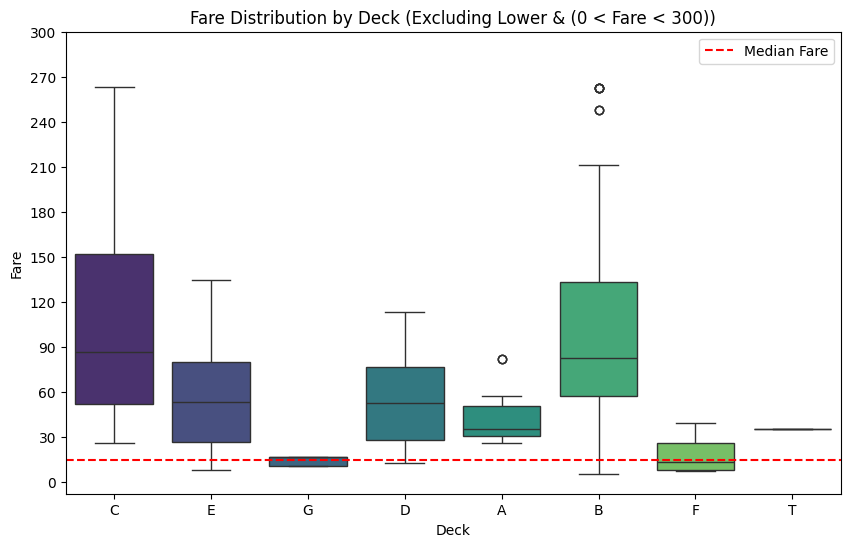

In [1009]:
# Filter out "Lower" deck passengers
known_decks_df = titanic_df[(titanic_df['Deck'] != 'Lower') & (titanic_df['Fare'] > 0) & (titanic_df['Fare'] < 300)]

# Descriptive statistics for Fare by Deck (excluding Lower)
fare_by_deck_stats = titanic_df[(titanic_df['Deck'] != 'Lower') & (titanic_df['Fare'] > 0) & (titanic_df['Fare'] < 300)].groupby('Deck')['Fare'].describe().round(2)
print("Descriptive Statistics for Fare by Deck (Excluding Lower):")
print(fare_by_deck_stats)

# Cleaned version with selected stats
cleaned_stats = fare_by_deck_stats[['count', 'mean', 'std', 'min', '50%', 'max']]
cleaned_stats = cleaned_stats.rename(columns={'50%': 'median'})
print("\nCleaned Descriptive Statistics for Fare by Deck:")
print(cleaned_stats)

# Box plot to visualize Fare distribution by Deck (excluding Lower)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Deck', y='Fare', data=known_decks_df, palette='viridis')
plt.title('Fare Distribution by Deck (Excluding Lower & (0 < Fare < 300))')
plt.xlabel('Deck')
plt.ylabel('Fare')
plt.yticks(np.arange(0,301,step=30))
plt.axhline(y=titanic_df['Fare'].median(), color='red', linestyle='--', label='Median Fare')
plt.legend()
plt.show()

In [1010]:
# Ticket Number Sequence Analysis
print("\nTicket Number Sequence Analysis:")

# Use the existing TicketNumber column, convert to numeric and exclude NaN values
titanic_df['TicketNumber'] = pd.to_numeric(titanic_df['TicketNumber'], errors='coerce')
ticket_groups = titanic_df.groupby(pd.qcut(titanic_df['TicketNumber'].dropna(), 10, duplicates='drop'))['Pclass'].value_counts()

print("Ticket Number Ranges and Class Distribution:")
print(ticket_groups)


Ticket Number Sequence Analysis:
Ticket Number Ranges and Class Distribution:
TicketNumber           Pclass
(1.999, 2667.4]        3          95
                       2          31
                       1           5
(2667.4, 9549.0]       3         117
                       2           9
                       1           5
(9549.0, 17569.0]      1          93
                       2          28
                       3          10
(17569.0, 28210.2]     1         101
                       2          17
                       3          11
(28210.2, 111163.0]    2          68
                       1          32
                       3          31
(111163.0, 236853.0]   1          87
                       2          44
                       3           0
(236853.0, 330971.8]   2          80
                       3          49
                       1           0
(330971.8, 349215.2]   3         131
                       1           0
                       2           0
(34

C:\Users\rcc_0\AppData\Local\Temp\ipykernel_27952\2713385655.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ticket_groups = titanic_df.groupby(pd.qcut(titanic_df['TicketNumber'].dropna(), 10, duplicates='drop'))['Pclass'].value_counts()


B2. Deck Variable Imputation

In [1011]:
# Step 1: Preprocess TicketNumber
# Ensure TicketNumber is numeric and handle 'LINE' tickets.
titanic_df['TicketNumber'] = titanic_df['TicketNumber'].fillna(399999).apply(
    lambda x: 399999 if str(x).strip().upper() == 'LINE' else int(x)
)

# Step 1.5: Generate 'FamilySize' distributions for 1st Class passengers. 
print("\nDebug: FamilySize Distribution in 1st Class (Pclass 1):")
print(titanic_df[titanic_df['Pclass'] == 1]['FamilySize'].value_counts())
print("\nDebug: FamilySize Distribution in 1st Class with Deck 'Lower':")
print(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Deck'] == 'Lower')]['FamilySize'].value_counts())

# Step 2: Define expected Deck-to-Pclass associations from Passenger Class cabin configurations and historical accounts.
historical_counts = {
    1: {'A': 42, 'B': 78, 'C': 128, 'D': 40, 'E': 34, 'T': 1},  # Total 323
    2: {'D': 118, 'E': 145, 'F': 14},                          # Total 277
    3: {'D': 50, 'E': 51, 'F': 444, 'G': 164}                  # Total 709
}
class_limits = {1: 323, 2: 277, 3: 709}
deck_limits = {'A': 42, 'B': 78, 'C': 128, 'D': 208, 'E': 230, 'F': 458, 'G': 164, 'T': 1}
allowed_decks = {
    1: ['A', 'B', 'C', 'D', 'E', 'T'],
    2: ['D', 'E', 'F'],
    3: ['D', 'E', 'F', 'G']
}

# Existing counts from Cabin and Pclass designations.
existing_counts = {
    1: {'A': 22, 'B': 65, 'C': 94, 'D': 40, 'E': 34, 'T': 1},
    2: {'D': 6, 'E': 4, 'F': 13},
    3: {'D': 0, 'E': 3, 'F': 8, 'G': 5}
}

# Initialize current counts and deck totals based on existing assignments
current_counts = {pclass: {deck: existing_counts[pclass].get(deck, 0) for deck in allowed_decks[pclass]} for pclass in [1, 2, 3]}
deck_totals = {'A': 22, 'B': 65, 'C': 94, 'D': 46, 'E': 43, 'F': 21, 'G': 5, 'T': 1}
print("\nDebug: Initial Current Counts:")
print(current_counts)
print("\nDebug: Initial Deck Totals:")
print(deck_totals)

# Step 2.5: Pre-Assign 113 Queenstown 3rd Class Passengers to G Deck.
print("\n--- Pre-Assigning Queenstown 3rd Class Passengers to G Deck ---")
queenstown_target = 113
mask_queenstown = (titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'Q')
queenstown_passengers = titanic_df[mask_queenstown].sort_values(['TicketNumber', 'Ticket'])
queenstown_count = min(queenstown_target, len(queenstown_passengers))
assigned_count = 0
queenstown_indices = []

# First, count how many Queenstown passengers are already on G Deck.
current_queenstown_on_g = len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'Q') & (titanic_df['Deck'] == 'G')])
remaining_queenstown = queenstown_target - current_queenstown_on_g

if remaining_queenstown > 0:
    # Filter Queenstown passengers not already on G Deck
    mask_queenstown_not_g = (titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'Q') & (titanic_df['Deck'] != 'G')
    queenstown_not_g = titanic_df[mask_queenstown_not_g].sort_values(['TicketNumber', 'Ticket'])
    grouped_by_ticket = queenstown_not_g.groupby('Ticket')
    for ticket, group in grouped_by_ticket:
        if assigned_count >= remaining_queenstown:
            break
        indices = group.index
        # Update deck assignment
        old_decks = titanic_df.loc[indices, 'Deck']
        for idx in indices:
            old_deck = titanic_df.loc[idx, 'Deck']
            if old_deck in current_counts[3]:
                current_counts[3][old_deck] -= 1
                deck_totals[old_deck] -= 1
        titanic_df.loc[indices, 'Deck'] = 'G'
        current_counts[3]['G'] += len(indices)
        deck_totals['G'] += len(indices)
        assigned_count += len(indices)
        queenstown_indices.extend(indices)
        print(f"\nAssigned {len(indices)} Queenstown passengers to G Deck for Pclass 3 (Ticket: {ticket}):")
        print(titanic_df.loc[indices, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']])

print("\nDebug: Current Counts After Queenstown Pre-Assignment:")
print(current_counts)
print("\nDebug: Deck Totals After Queenstown Pre-Assignment:")
print(deck_totals)

# Use actual Pclass distribution to identify discrepancies
class_counts = titanic_df['Pclass'].value_counts().to_dict()
print("\nDebug: Class Counts (from Pclass distribution):", class_counts)

# Step 3: Adjust assignments to meet targets
# First, handle excess passengers by moving them to 'Lower'
for pclass in [1, 2, 3]:
    current_total = sum(current_counts[pclass].values())
    target_total = class_limits[pclass]
    if current_total > target_total:
        excess = current_total - target_total
        print(f"\nDebug: Pclass {pclass} has {excess} excess passengers. Moving to 'Lower'.")
        for deck in allowed_decks[pclass]:
            if excess <= 0:
                break
            current = current_counts[pclass][deck]
            target = historical_counts[pclass].get(deck, 0)
            if current > target:
                to_move = min(current - target, excess)
                # Find passengers on this deck to move to 'Lower'
                mask = (titanic_df['Pclass'] == pclass) & (titanic_df['Deck'] == deck)
                passengers_to_move = titanic_df[mask].sort_values(['TicketNumber', 'Ticket']).index[:to_move]
                titanic_df.loc[passengers_to_move, 'Deck'] = 'Lower'
                current_counts[pclass][deck] -= to_move
                deck_totals[deck] -= to_move
                excess -= to_move
                print(f"\nMoved {to_move} passengers from {deck} (Pclass {pclass}) to 'Lower':")
                print(titanic_df.loc[passengers_to_move, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']])

# Step 3.5: Fix Deck A FamilySize violations
deck_a_violations = (titanic_df['Pclass'] == 1) & (titanic_df['Deck'] == 'A') & (titanic_df['FamilySize'] > 1)
if deck_a_violations.sum() > 0:
    print(f"\nDebug: Moving {deck_a_violations.sum()} Deck A passengers with FamilySize > 1 back to Lower")
    titanic_df.loc[deck_a_violations, 'Deck'] = 'Lower'

# Step 4: Reassignment with strict limits and ascending TicketNumber
historical_counts = {
    1: {'A': 42, 'B': 78, 'C': 128, 'D': 40, 'E': 34, 'T': 1},
    2: {'D': 118, 'E': 145, 'F': 14},
    3: {'D': 50, 'E': 51, 'F': 444, 'G': 164}
}
deck_limits = {'A': 42, 'B': 78, 'C': 128, 'D': 208, 'E': 230, 'F': 458, 'G': 164, 'T': 1}

remaining_lower = titanic_df['Deck'] == 'Lower'
initial_lower_count = remaining_lower.sum()
print(f"\nDebug: Initial Total Lower Count: {initial_lower_count}")

for pclass in [1, 2, 3]:
    class_mask = remaining_lower & (titanic_df['Pclass'] == pclass)
    remaining = class_mask.sum()
    print(f"\nDebug: Pclass {pclass} - Remaining Lower: {remaining}")
    if remaining > 0:
        # Group by ticket to ensure ticket groups stay together
        unassigned = titanic_df[class_mask].sort_values(['TicketNumber', 'Ticket']).copy()
        ticket_groups = unassigned.groupby('Ticket').agg({
            'PassengerId': 'count',
            'TicketNumber': 'first',
            'FamilySize': 'first'
        }).rename(columns={'PassengerId': 'GroupSize'}).reset_index()
        ticket_groups = ticket_groups.sort_values('TicketNumber')
        decks = {
            1: ['A', 'B', 'C', 'D', 'E', 'T'],
            2: ['D', 'E', 'F'],
            3: ['D', 'E', 'F', 'G']
        }[pclass]
        for deck in decks:
            if remaining <= 0:
                break
            # Get current counts directly from DataFrame
            current_dist = pd.crosstab(titanic_df['Pclass'], titanic_df['Deck'])
            current = current_dist.get(deck, pd.Series(0, index=[pclass])).get(pclass, 0)
            historical = historical_counts[pclass].get(deck, 0)
            deck_total = titanic_df['Deck'].value_counts().get(deck, 0)
            deck_limit = deck_limits.get(deck, 0)
            available_slots = min(historical - current, deck_limit - deck_total, remaining)
            print(f"\nDebug: Checking Deck {deck} - Current: {current}, Historical: {historical}, Deck Total: {deck_total}, Deck Limit: {deck_limit}, Available Slots: {available_slots}")
            if available_slots <= 0:
                print(f"Debug: Skipping Deck {deck} - No available slots.")
                continue
            assigned_count = 0
            for _, row in ticket_groups.iterrows():
                ticket = row['Ticket']
                group_size = row['GroupSize']
                family_size = row['FamilySize']
                ticket_number = row['TicketNumber']
                if assigned_count + group_size > available_slots:
                    continue  # Skip if group doesn't fit
                if pclass == 1 and deck == 'A' and family_size > 1:
                    print(f"Debug: Skipping Ticket {ticket} (TicketNumber: {ticket_number}) for Deck A - FamilySize {family_size} > 1")
                    continue
                indices = unassigned[unassigned['Ticket'] == ticket].index
                titanic_df.loc[indices, 'Deck'] = deck
                assigned_count += group_size
                remaining -= group_size
                print(f"\nReassigned {group_size} Lower to {deck} for Pclass {pclass} (Ticket: {ticket}, TicketNumber: {ticket_number}):")
                print(titanic_df.loc[indices, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']])
                unassigned = unassigned.drop(indices)
            ticket_groups = ticket_groups[~ticket_groups['Ticket'].isin(titanic_df[titanic_df['Deck'] != 'Lower']['Ticket'])]
            class_mask = (titanic_df['Deck'] == 'Lower') & (titanic_df['Pclass'] == pclass)
            remaining = class_mask.sum()
            print(f"\nDebug: Pclass {pclass} - Remaining Lower After Deck {deck}: {remaining}")

# Step 5: Final Sweep with strict limits
remaining_lower = titanic_df['Deck'] == 'Lower'
if remaining_lower.sum() > 0:
    for pclass in [1, 2, 3]:
        class_mask = remaining_lower & (titanic_df['Pclass'] == pclass)
        remaining = class_mask.sum()
        if remaining > 0:
            unassigned = titanic_df[class_mask].sort_values(['TicketNumber', 'Ticket']).copy()
            ticket_groups = unassigned.groupby('Ticket').agg({
                'PassengerId': 'count',
                'TicketNumber': 'first',
                'FamilySize': 'first'
            }).rename(columns={'PassengerId': 'GroupSize'}).reset_index()
            ticket_groups = ticket_groups.sort_values('TicketNumber')
            decks = {
                1: ['B', 'C', 'D', 'E', 'T'],
                2: ['D', 'E', 'F'],
                3: ['D', 'E', 'F', 'G']
            }[pclass]
            for deck in decks:
                if remaining <= 0:
                    break
                current_dist = pd.crosstab(titanic_df['Pclass'], titanic_df['Deck'])
                current = current_dist.get(deck, pd.Series(0, index=[pclass])).get(pclass, 0)
                historical = historical_counts[pclass].get(deck, 0)
                deck_total = titanic_df['Deck'].value_counts().get(deck, 0)
                deck_limit = deck_limits.get(deck, 0)
                available_slots = min(historical - current, deck_limit - deck_total, remaining)
                print(f"\nDebug: Final Sweep - Checking Deck {deck} - Current: {current}, Historical: {historical}, Deck Total: {deck_total}, Deck Limit: {deck_limit}, Available Slots: {available_slots}")
                if available_slots <= 0:
                    print(f"Debug: Final Sweep - Skipping Deck {deck} - No available slots.")
                    continue
                assigned_count = 0
                for _, row in ticket_groups.iterrows():
                    ticket = row['Ticket']
                    group_size = row['GroupSize']
                    family_size = row['FamilySize']
                    ticket_number = row['TicketNumber']
                    if assigned_count + group_size > available_slots:
                        continue
                    indices = unassigned[unassigned['Ticket'] == ticket].index
                    titanic_df.loc[indices, 'Deck'] = deck
                    assigned_count += group_size
                    remaining -= group_size
                    print(f"\nFinal Sweep: Reassigned {group_size} Lower to {deck} for Pclass {pclass} (Ticket: {ticket}, TicketNumber: {ticket_number}):")
                    print(titanic_df.loc[indices, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']])
                    unassigned = unassigned.drop(indices)
                ticket_groups = ticket_groups[~ticket_groups['Ticket'].isin(titanic_df[titanic_df['Deck'] != 'Lower']['Ticket'])]
                class_mask = (titanic_df['Deck'] == 'Lower') & (titanic_df['Pclass'] == pclass)
                remaining = class_mask.sum()
                print(f"\nDebug: Pclass {pclass} - Remaining Lower After Final Sweep Deck {deck}: {remaining}")

# Final Validation
print("\n--- Final Validation ---")
print("\nDebug: Deck Counts After Final Reassignment:")
print(titanic_df['Deck'].value_counts())
print("\nDebug: Tickets with Deck == 'Lower' After Final Reassignment:")
print(titanic_df[titanic_df['Deck'] == 'Lower'][['PassengerId', 'TicketNumber', 'Pclass', 'Deck', 'FamilySize']])
print("\nDebug: Final Pclass Distribution:")
print(titanic_df['Pclass'].value_counts().to_dict())
print("\nCurrent Deck Distribution by Pclass:")
print(pd.crosstab(titanic_df['Pclass'], titanic_df['Deck']))
print("\nNumber of 3rd Class Queenstown Passengers on G Deck:")
queenstown_g = titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Embarked'] == 'Q') & (titanic_df['Deck'] == 'G')]
print(len(queenstown_g))
print("\nFamilySize Distribution on Deck A (Pclass 1):")
print(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Deck'] == 'A')]['FamilySize'].value_counts())
print("\nSample of Passengers with Imputed Deck:")
print(titanic_df[titanic_df['Cabin'].isna()][['PassengerId', 'Pclass', 'Embarked', 'Deck', 'Ticket', 'TicketNumber', 'FamilySize']].head(10))


Debug: FamilySize Distribution in 1st Class (Pclass 1):
FamilySize
0    160
1    104
2     39
3      9
5      6
4      5
Name: count, dtype: int64

Debug: FamilySize Distribution in 1st Class with Deck 'Lower':
FamilySize
0    53
1    11
2     3
Name: count, dtype: int64

Debug: Initial Current Counts:
{1: {'A': 22, 'B': 65, 'C': 94, 'D': 40, 'E': 34, 'T': 1}, 2: {'D': 6, 'E': 4, 'F': 13}, 3: {'D': 0, 'E': 3, 'F': 8, 'G': 5}}

Debug: Initial Deck Totals:
{'A': 22, 'B': 65, 'C': 94, 'D': 46, 'E': 43, 'F': 21, 'G': 5, 'T': 1}

--- Pre-Assigning Queenstown 3rd Class Passengers to G Deck ---

Assigned 1 Queenstown passengers to G Deck for Pclass 3 (Ticket: 12460):
     PassengerId  TicketNumber Deck  Pclass  FamilySize
790          791         12460    G       3           0

Assigned 1 Queenstown passengers to G Deck for Pclass 3 (Ticket: 14311):
    PassengerId  TicketNumber Deck  Pclass  FamilySize
47           48         14311    G       3           0

Assigned 1 Queenstown passengers 

B3. Investigate & Reallocate Two Unimputed Lower Values In 2nd Class & One Imputed Value In 3rd Class For Deck Variable

In [1012]:
# Standalone block to display 2nd Class ticket numbers in ascending order with assigned decks
print("\n2nd Class Ticket Numbers (Ascending) with Assigned Decks:")
# Filter for 2nd Class and select relevant columns
second_class = titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Cabin'].isna())]
# Group by Ticket to get unique ticket numbers and their decks
second_class_unique = second_class.groupby('Ticket').first().reset_index()
# Sort by TicketNumber in ascending order
second_class_sorted = second_class_unique.sort_values('TicketNumber')
# Print the results
print("TicketNumber  Deck")
print("-" * 20)
for _, row in second_class_sorted.iterrows():
    print(f"{row['TicketNumber']:<12} {row['Deck']}")


2nd Class Ticket Numbers (Ascending) with Assigned Decks:
TicketNumber  Deck
--------------------
2            D
3            D
751          D
752          D
1166         D
1585         D
1748         D
2003         D
2079         D
2123         D
2131         D
2133         D
2146         D
2147         D
2148         D
2149         D
2159         D
2167         D
2168         D
2861         D
2908         D
2926         D
3085         D
3381         D
11668        D
12233        D
13528        D
13529        D
13531        D
13534        D
13540        D
14208        D
14258        D
14260        D
14263        D
14879        D
14885        D
14888        D
15185        D
17248        D
18723        D
24065        D
24579        D
24580        D
26360        D
26707        D
27849        D
28004        D
28034        D
28133        D
28134        D
28206        D
28213        D
28220        D
28221        D
28228        D
28403        D
28404        D
28424        D
28425        D
2

In [1013]:
# Standalone block to investigate ticket 29750 in 2nd Class
print("\nInvestigating Ticket 29750 in 2nd Class:")
# Filter for ticket 29750 in 2nd Class
ticket_29750 = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Ticket'] == '29750')
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize', 'Cabin']]

# Check if the ticket exists
if not ticket_29750.empty:
    passenger_count = len(ticket_29750)
    print(f"\nTicket 29750 - Number of Passengers: {passenger_count}")
    print("Details:")
    print(ticket_29750)
    # Check if the deck was imputed (Cabin was originally null)
    if ticket_29750['Cabin'].isna().all():
        print("\nNote: Deck was imputed (original Cabin value was missing).")
    else:
        print("\nNote: Deck was not imputed (original Cabin value exists).")
else:
    print("\nTicket 29750 not found in 2nd Class.")


Investigating Ticket 29750 in 2nd Class:

Ticket 29750 - Number of Passengers: 3
Details:
      PassengerId Ticket  TicketNumber Deck  Pclass  FamilySize Cabin
670           671  29750         29750    E       2           2   NaN
684           685  29750         29750    E       2           2   NaN
1066         1067  29750         29750    E       2           2   NaN

Note: Deck was imputed (original Cabin value was missing).


In [1014]:
# Standalone block to list 2nd Class Deck F ticket numbers in ascending order
print("\n2nd Class Deck F Ticket Numbers (Ascending Order):")
# Filter for 2nd Class passengers on Deck F
deck_f_2nd_class = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Deck'] == 'F')
][['Ticket', 'TicketNumber']]

# Group by Ticket to get unique ticket numbers
deck_f_unique = deck_f_2nd_class.groupby('Ticket').first().reset_index()
# Sort by TicketNumber in ascending order
deck_f_sorted = deck_f_unique.sort_values('TicketNumber')
# Check the count of unique ticket numbers
ticket_count = len(deck_f_sorted)
print(f"\nTotal Unique Ticket Numbers on Deck F: {ticket_count}")
# Print the sorted ticket numbers
print("TicketNumber")
print("-" * 12)
for _, row in deck_f_sorted.iterrows():
    print(f"{row['TicketNumber']}")


2nd Class Deck F Ticket Numbers (Ascending Order):

Total Unique Ticket Numbers on Deck F: 8
TicketNumber
------------
14266
29395
34260
230080
230136
244368
248733
248734


In [1015]:
# Standalone block to investigate ticket 250653 in 2nd Class
print("\nInvestigating Ticket 250653 in 2nd Class:")
# Filter for ticket 250653in 2nd Class
ticket_250653 = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Ticket'] == '250653')
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize', 'Cabin']]

# Check if the ticket exists
if not ticket_250653.empty:
    passenger_count = len(ticket_250653)
    print(f"\nTicket 250653 - Number of Passengers: {passenger_count}")
    print("Details:")
    print(ticket_250653)
    # Check if the deck was imputed (Cabin was originally null)
    if ticket_250653['Cabin'].isna().all():
        print("\nNote: Deck was imputed (original Cabin value was missing).")
    else:
        print("\nNote: Deck was not imputed (original Cabin value exists).")
else:
    print("\nTicket 250653 not found in 2nd Class.")


Investigating Ticket 250653 in 2nd Class:

Ticket 250653 - Number of Passengers: 1
Details:
     PassengerId  Ticket  TicketNumber Deck  Pclass  FamilySize Cabin
178          179  250653        250653    E       2           0   NaN

Note: Deck was imputed (original Cabin value was missing).


In [1016]:
# Standalone block to reassign tickets 250653 and 250655 in 2nd Class in specified order
print("\nReassigning Tickets 250653 and 250655 in 2nd Class (In Specified Order):")

# Step 1: Check and move ticket 250653 to F (First Action)
print("\nChecking and Moving Ticket 250653:")
ticket_250653 = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Ticket'] == '250653')
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']]
if not ticket_250653.empty:
    passenger_count_250653 = len(ticket_250653)
    print(f"\nTicket 250653 - Number of Passengers: {passenger_count_250653}")
    print("Details:")
    print(ticket_250653)
    current_deck_250653 = ticket_250653['Deck'].iloc[0]
    if current_deck_250653 == 'E':
        titanic_df.loc[ticket_250653.index, 'Deck'] = 'F'
        print(f"\nMoved ticket 250653 from Deck E to Deck F:")
        print(titanic_df.loc[ticket_250653.index, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
    elif current_deck_250653 == 'Lower':
        titanic_df.loc[ticket_250653.index, 'Deck'] = 'F'
        print(f"\nAssigned ticket 250653 from Lower to Deck F:")
        print(titanic_df.loc[ticket_250653.index, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
    else:
        print(f"\nTicket 250653 is on Deck {current_deck_250653}, no action taken for reassignment to F.")
else:
    print("\nTicket 250653 not found in 2nd Class.")

# Step 2: Check and assign both ticket 250655 passengers from Lower to E (Second Action)
print("\nChecking and Assigning Ticket 250655:")
ticket_250655 = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Ticket'] == '250655')
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Pclass', 'FamilySize']]
if not ticket_250655.empty:
    passenger_count_250655 = len(ticket_250655)
    print(f"\nTicket 250655 - Number of Passengers: {passenger_count_250655}")
    print("Details:")
    print(ticket_250655)
    if (ticket_250655['Deck'] == 'Lower').all():
        titanic_df.loc[ticket_250655.index, 'Deck'] = 'E'
        print(f"\nAssigned all ticket 250655 passengers from Lower to Deck E:")
        print(titanic_df.loc[ticket_250655.index, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
    else:
        print(f"\nNot all ticket 250655 passengers are in Lower, current decks:")
        print(ticket_250655[['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
else:
    print("\nTicket 250655 not found in 2nd Class.")

# Step 3: Verify the new deck distribution for 2nd Class
print("\nNew Deck Distribution for 2nd Class:")
deck_distribution = pd.crosstab(titanic_df[titanic_df['Pclass'] == 2]['Pclass'], titanic_df[titanic_df['Pclass'] == 2]['Deck'])
print(deck_distribution)
print(f"\nTotal 2nd Class Passengers: {deck_distribution.sum().sum()}")

# Step 4: Check for any remaining Lower passengers in 2nd Class
print("\nRemaining Lower Passengers in 2nd Class:")
lower_remaining = titanic_df[
    (titanic_df['Pclass'] == 2) &
    (titanic_df['Deck'] == 'Lower')
][['PassengerId', 'TicketNumber', 'Deck', 'Pclass']]
print(lower_remaining)


Reassigning Tickets 250653 and 250655 in 2nd Class (In Specified Order):

Checking and Moving Ticket 250653:

Ticket 250653 - Number of Passengers: 1
Details:
     PassengerId  Ticket  TicketNumber Deck  Pclass  FamilySize
178          179  250653        250653    E       2           0

Moved ticket 250653 from Deck E to Deck F:
     PassengerId  TicketNumber Deck  Pclass
178          179        250653    F       2

Checking and Assigning Ticket 250655:

Ticket 250655 - Number of Passengers: 2
Details:
     PassengerId  Ticket  TicketNumber   Deck  Pclass  FamilySize
427          428  250655        250655  Lower       2           0
705          706  250655        250655  Lower       2           0

Assigned all ticket 250655 passengers from Lower to Deck E:
     PassengerId  TicketNumber Deck  Pclass
427          428        250655    E       2
705          706        250655    E       2

New Deck Distribution for 2nd Class:
Deck      D    E   F
Pclass              
2       118  145  14

In [ ]:
# Standalone block to identify misassigned passenger and list swap candidates from F to G
print("\nIdentifying Misassigned 3rd Class Queenstown Passenger and Swap Candidates:")

# Step 1: Identify 3rd Class Queenstown passenger on G with F cabin
queenstown_g_with_f = titanic_df[
    (titanic_df['Pclass'] == 3) &
    (titanic_df['Embarked'] == 'Q') &
    (titanic_df['Deck'] == 'G') &
    (titanic_df['Cabin'].notna()) &
    (titanic_df['Cabin'].str.startswith('F', na=False))
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]

if not queenstown_g_with_f.empty:
    print("\nMisassigned Queenstown 3rd Class Passenger on G with F Cabin:")
    print(queenstown_g_with_f)
    misassigned_passenger = queenstown_g_with_f.iloc[0]
    misassigned_index = queenstown_g_with_f.index[0]
else:
    print("\nNo 3rd Class Queenstown passengers found on G with F cabin assignment.")
    exit()

# Step 2: List 3rd Class imputed passengers on F as swap candidates, sorted by TicketNumber
imputed_f_candidates = titanic_df[
    (titanic_df['Pclass'] == 3) &
    (titanic_df['Deck'] == 'F') &
    (titanic_df['Cabin'].isna())
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass']].sort_values('TicketNumber')

if not imputed_f_candidates.empty:
    print("\nPotential Swap Candidates on Deck F (Imputed Decks, Sorted by TicketNumber):")
    print(imputed_f_candidates)
else:
    print("\nNo imputed 3rd Class passengers found on F for swap.")
    exit()


Identifying Misassigned 3rd Class Queenstown Passenger and Swap Candidates:

Misassigned Queenstown 3rd Class Passenger on G with F Cabin:
     PassengerId  Ticket  TicketNumber Deck Cabin  Pclass Embarked
776          777  383121        383121    G   F38       3        Q

Potential Swap Candidates on Deck F (Imputed Decks, Sorted by TicketNumber):
      PassengerId              Ticket  TicketNumber Deck Cabin  Pclass
746           747           C.A. 2673          2673    F   NaN       3
279           280           C.A. 2673          2673    F   NaN       3
1283         1284           C.A. 2673          2673    F   NaN       3
773           774                2674          2674    F   NaN       3
1228         1229                2675          2675    F   NaN       3
1165         1166                2676          2676    F   NaN       3
36             37                2677          2677    F   NaN       3
140           141                2678          2678    F   NaN       3
852      

In [1018]:
# Standalone block to swap 3rd Class passengers with TicketNumbers 383121 and 3101277
print("\nSwapping 3rd Class Passengers with TicketNumbers 383121 and 3101277:")

# Step 1: Identify passenger with TicketNumber 383121
passenger_383121 = titanic_df[
    (titanic_df['Pclass'] == 3) &
    (titanic_df['TicketNumber'] == '383121')  # Try as string, adjust if needed
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]

if not passenger_383121.empty:
    print("\nPassenger with TicketNumber 383121:")
    print(passenger_383121)
    index_383121 = passenger_383121.index[0]
    current_deck_383121 = passenger_383121['Deck'].iloc[0]
else:
    passenger_383121 = titanic_df[
        (titanic_df['Pclass'] == 3) &
        (titanic_df['Ticket'] == '383121')  # Try Ticket column as fallback
    ][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]
    if not passenger_383121.empty:
        print("\nFound passenger with Ticket 383121 using 'Ticket' column:")
        print(passenger_383121)
        index_383121 = passenger_383121.index[0]
        current_deck_383121 = passenger_383121['Deck'].iloc[0]
    else:
        print("\nError: No passenger found with TicketNumber or Ticket 383121 in 3rd Class.")
        index_383121 = None
        current_deck_383121 = None

# Step 2: Identify passenger with TicketNumber 3101277
passenger_3101277 = titanic_df[
    (titanic_df['Pclass'] == 3) &
    (titanic_df['TicketNumber'] == '3101277')  # Try as string, adjust if needed
][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]

if not passenger_3101277.empty:
    print("\nPassenger with TicketNumber 3101277:")
    print(passenger_3101277)
    index_3101277 = passenger_3101277.index[0]
    current_deck_3101277 = passenger_3101277['Deck'].iloc[0]
else:
    passenger_3101277 = titanic_df[
        (titanic_df['Pclass'] == 3) &
        (titanic_df['Ticket'] == '3101277')  # Try Ticket column as fallback
    ][['PassengerId', 'Ticket', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]
    if not passenger_3101277.empty:
        print("\nFound passenger with Ticket 3101277 using 'Ticket' column:")
        print(passenger_3101277)
        index_3101277 = passenger_3101277.index[0]
        current_deck_3101277 = passenger_3101277['Deck'].iloc[0]
    else:
        print("\nError: No passenger found with TicketNumber or Ticket 3101277 in 3rd Class.")
        index_3101277 = None
        current_deck_3101277 = None

# Step 3: Perform the swap only if both passengers are found
if index_383121 is not None and index_3101277 is not None:
    titanic_df.loc[index_383121, 'Deck'] = 'F'
    titanic_df.loc[index_3101277, 'Deck'] = 'G'
    print(f"\nSwapped Decks:")
    print(f"Passenger with TicketNumber 383121 moved from {current_deck_383121} to F:")
    print(titanic_df.loc[index_383121, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
    print(f"Passenger with TicketNumber 3101277 moved from {current_deck_3101277} to G:")
    print(titanic_df.loc[index_3101277, ['PassengerId', 'TicketNumber', 'Deck', 'Pclass']])
else:
    print("\nError: Cannot perform swap. One or both passengers not found.")

# Step 4: Verify the new deck distribution for 3rd Class
print("\nNew Deck Distribution for 3rd Class:")
deck_distribution = pd.crosstab(titanic_df[titanic_df['Pclass'] == 3]['Pclass'], titanic_df[titanic_df['Pclass'] == 3]['Deck'])
print(deck_distribution)
print(f"\nTotal 3rd Class Passengers: {deck_distribution.sum().sum()}")

# Step 5: Check for any remaining misassigned Queenstown passengers on G with F cabins
print("\nRemaining 3rd Class Queenstown Passengers on G with F Cabin:")
remaining_misassigned = titanic_df[
    (titanic_df['Pclass'] == 3) &
    (titanic_df['Embarked'] == 'Q') &
    (titanic_df['Deck'] == 'G') &
    (titanic_df['Cabin'].notna()) &
    (titanic_df['Cabin'].str.startswith('F', na=False))
][['PassengerId', 'TicketNumber', 'Deck', 'Cabin', 'Pclass', 'Embarked']]
print(remaining_misassigned)


Swapping 3rd Class Passengers with TicketNumbers 383121 and 3101277:

Found passenger with Ticket 383121 using 'Ticket' column:
     PassengerId  Ticket  TicketNumber Deck Cabin  Pclass Embarked
776          777  383121        383121    G   F38       3        Q

Found passenger with Ticket 3101277 using 'Ticket' column:
     PassengerId   Ticket  TicketNumber Deck Cabin  Pclass Embarked
392          393  3101277       3101277    F   NaN       3        S

Swapped Decks:
Passenger with TicketNumber 383121 moved from G to F:
PassengerId        777
TicketNumber    383121
Deck                 F
Pclass               3
Name: 776, dtype: object
Passenger with TicketNumber 3101277 moved from F to G:
PassengerId         393
TicketNumber    3101277
Deck                  G
Pclass                3
Name: 392, dtype: object

New Deck Distribution for 3rd Class:
Deck     D   E    F    G
Pclass                  
3       50  51  444  164

Total 3rd Class Passengers: 709

Remaining 3rd Class Queenstown 

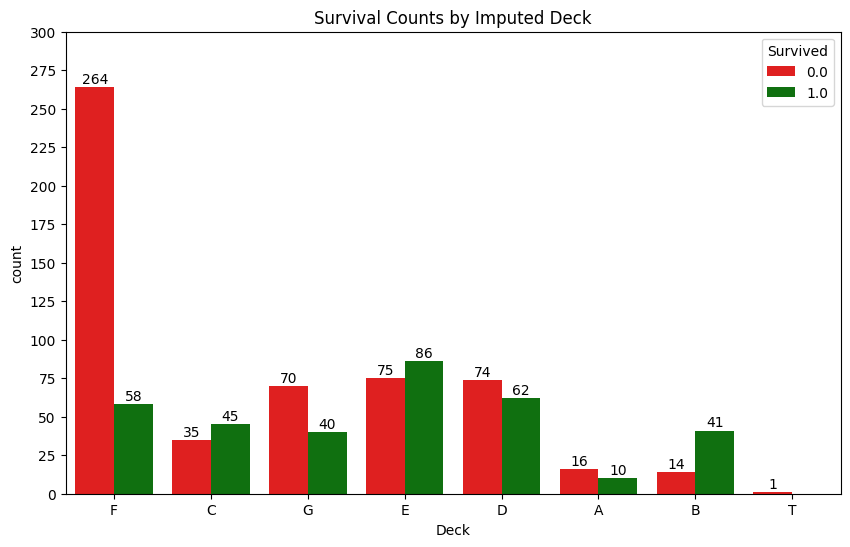

In [1019]:
# Step 4: Validate with survival counts
train_df = titanic_df[titanic_df['Survived'].notna()]
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=titanic_df['Deck'], hue='Survived', data=train_df, palette={0: 'red', 1: 'green'})
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 5, int(height),
                ha="center", va="center", color="black", fontsize=10)
plt.title('Survival Counts by Imputed Deck')
plt.yticks(np.arange(0,301,step=25))
plt.show()

C1. Exploratory Preliminary Analysis For Age Imputation

In [1020]:
# Compute descriptive statistics for Age by Title for non-missing Age values.
titanic_df.groupby('Title')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Title,,,,,,,,
Capt,1.0,70.000000,NaN,70.00,70.00,70.0,70.00,70.0
Col,4.0,54.000000,5.477226,47.00,51.50,54.5,57.00,60.0
Countess,1.0,33.000000,NaN,33.00,33.00,33.0,33.00,33.0
Don,1.0,40.000000,NaN,40.00,40.00,40.0,40.00,40.0
Dona,1.0,39.000000,NaN,39.00,39.00,39.0,39.00,39.0
Dr,7.0,43.571429,11.731115,23.00,38.00,49.0,51.50,54.0
Jonkheer,1.0,38.000000,NaN,38.00,38.00,38.0,38.00,38.0
Lady,1.0,48.000000,NaN,48.00,48.00,48.0,48.00,48.0
Major,2.0,48.500000,4.949747,45.00,46.75,48.5,50.25,52.0


In [1021]:
# Filter dataset to non-missing ages
titanic_non_missing = titanic_df[titanic_df['Age'].notnull()]

# Group by FamilyID to identify families with Mrs., Master, Miss, and Mr.
family_groups = titanic_non_missing.groupby('FamilyID')

# Initialize lists to store age differences
mother_child_diffs = []

# Iterate through families to calculate age differences
for family_id, group in family_groups:
    # Identify Mrs., Master, Miss, and Mr. in the family with non-missing ages
    mrs = group[group['Title'] == 'Mrs']
    master = group[group['Title'] == 'Master']
    miss = group[group['Title'] == 'Miss']
    mr = group[group['Title'] == 'Mr']
   
    # Case 1: Mother (Mrs.) and Children (Master/Mr/Miss)
    if not mrs.empty and (not master.empty or not mr.empty or not miss.empty):
        mrs_age = mrs['Age'].mean() # Average age if multiple Mrs.
        # Calculate difference with Master (boys)
        if not master.empty:
            for child_age in master['Age']:
                diff = mrs_age - child_age
                if diff > 0:  # Ensure positive difference
                    mother_child_diffs.append(diff)
        # Calculate difference with Mr (boys)
        if not mr.empty:
            # Filter Mr. to likely sons (age < 19)
            potential_sons = mr[mr['Age'] < 19]
            for child_age in potential_sons['Age']:
                diff = mrs_age - child_age
                if diff > 0:  # Ensure positive difference
                    mother_child_diffs.append(diff)
        # Calculate difference with Miss (age < 19)
        if not miss.empty:
            # Filter Miss to likely daughters (age < 19)
            potential_daughters = miss[miss['Age'] < 19]
            for child_age in potential_daughters['Age']:
                diff = mrs_age - child_age
                if diff > 0:  # Ensure positive difference
                    mother_child_diffs.append(diff)

# Mother-Child Age Differences
if mother_child_diffs:
    print("\nMother (Mrs.) to Child (Master/Mr/Miss) Age Differences (Non-Missing Ages):")
    print(f"Count: {len(mother_child_diffs)}")
    print(f"Mean: {np.mean(mother_child_diffs):.2f}")
    print(f"Std: {np.std(mother_child_diffs):.2f}")
    print(f"Min: {np.min(mother_child_diffs):.2f}")
    print(f"25%: {np.percentile(mother_child_diffs, 25):.2f}")
    print(f"Median: {np.median(mother_child_diffs):.2f}")
    print(f"75%: {np.percentile(mother_child_diffs, 75):.2f}")
    print(f"Max: {np.max(mother_child_diffs):.2f}")
else:
    print("\nNo families with non-missing ages found for Mrs. and Master/Mr/Miss age difference calculation.")


Mother (Mrs.) to Child (Master/Mr/Miss) Age Differences (Non-Missing Ages):
Count: 104
Mean: 28.16
Std: 6.76
Min: 15.58
25%: 23.00
Median: 27.00
75%: 33.00
Max: 50.00


In [1022]:
# Filter dataset to rows with missing Age values
missing_age_df = titanic_df[titanic_df['Age'].isnull()]

# Calculate the distribution of Title for missing Age values
title_distribution = missing_age_df['Title'].value_counts()

# Display the distribution
print("Distribution of Title for Missing Age Values:")
print(title_distribution)

Distribution of Title for Missing Age Values:
Title
Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: count, dtype: int64


In [1023]:
# Group by FamilyID and collect Titles, Ages, and Missing Ages, only for families with missing ages.
family_summary = titanic_df.groupby('FamilyID').agg({
    'Title': lambda x: list(x),                     # List of titles in the family
    'Age': lambda x: list(x),                       # List of ages (including NaN)
    'PassengerId': 'count'                          # Count of passengers in the family
}).reset_index()

# Filter for families with at least one missing age.
family_summary = family_summary[family_summary['Age'].apply(lambda x: any(pd.isna(x)))]

# Add columns for missing and known ages
family_summary['MissingAgeCount'] = family_summary['Age'].apply(lambda x: sum(pd.isna(x)))
family_summary['KnownAges'] = family_summary['Age'].apply(lambda x: [age for age in x if pd.notna(age)])
family_summary['KnownAgeCount'] = family_summary['KnownAges'].apply(len)

# Display the summary for families with missing ages only.
print("\nFamilyID Summary with Titles, Ages, and Missing Ages (Only Families with Missing Ages):")
for _, row in family_summary.iterrows():
    print(f"\nFamilyID: {row['FamilyID']}")
    print(f"Total Passengers: {row['PassengerId']}")
    print(f"Titles: {row['Title']}")
    print(f"Ages (including missing): {row['Age']}")
    print(f"Known Ages: {row['KnownAges']}")
    print(f"Missing Ages Count: {row['MissingAgeCount']}")
    print(f"Known Ages Count: {row['KnownAgeCount']}")

# Additional: Total missing ages by title
missing_by_title = titanic_df[titanic_df['Age'].isna()].groupby('Title').size().reset_index(name='MissingCount')
print("\nTotal Missing Ages by Title:")
print(missing_by_title)


FamilyID Summary with Titles, Ages, and Missing Ages (Only Families with Missing Ages):

FamilyID: Baumann_PC 17318
Total Passengers: 1
Titles: ['Mr']
Ages (including missing): [nan]
Known Ages: []
Missing Ages Count: 1
Known Ages Count: 0

FamilyID: Betros_2622
Total Passengers: 1
Titles: ['Master']
Ages (including missing): [nan]
Known Ages: []
Missing Ages Count: 1
Known Ages Count: 0

FamilyID: Boulos_2664
Total Passengers: 1
Titles: ['Mr']
Ages (including missing): [nan]
Known Ages: []
Missing Ages Count: 1
Known Ages Count: 0

FamilyID: Boulos_2678
Total Passengers: 3
Titles: ['Mrs', 'Miss', 'Master']
Ages (including missing): [nan, 9.0, 6.0]
Known Ages: [9.0, 6.0]
Missing Ages Count: 1
Known Ages Count: 2

FamilyID: Bourke_364848
Total Passengers: 1
Titles: ['Miss']
Ages (including missing): [nan]
Known Ages: []
Missing Ages Count: 1
Known Ages Count: 0

FamilyID: Bradley_111427
Total Passengers: 1
Titles: ['Mr']
Ages (including missing): [nan]
Known Ages: []
Missing Ages Count

In [1024]:
# Filter dataset to rows with non-missing Age values
titanic_non_missing = titanic_df[titanic_df['Age'].notnull()]

# Group by FamilyID to identify couples and parent pairs
family_groups = titanic_non_missing.groupby('FamilyID')

# Initialize lists to store age differences
wife_husband_diffs = []
mother_father_diffs = []

# Iterate through families to calculate age differences
for family_id, group in family_groups:
    # Identify Mr. and Mrs. in the family with non-missing ages
    mr = group[group['Title'] == 'Mr']
    mrs = group[group['Title'] == 'Mrs']
   
    # Case 1: Wife-Husband (Mr. and Mrs. pair, FamilySize = 1, Parch = 0, no children)
    if not mr.empty and not mrs.empty and len(group) == 2 and group['FamilySize'].iloc[0] == 1 and group['Parch'].all() == 0:
        mr_age = mr['Age'].mean()
        mrs_age = mrs['Age'].mean()
        diff = mrs_age - mr_age
        if diff > -10 and diff < 10:
            wife_husband_diffs.append(diff)
   
    # Case 2: Mother-Father (Mrs. and Mr. with children, FamilySize >= 2, Parch >= 1)
    children = group[group['Title'].isin(['Master', 'Miss']) | ((group['Title'] == 'Mr') & (group['Age'] < 19))]
    if not mrs.empty and not mr.empty and not children.empty and group['FamilySize'].iloc[0] >= 2 and group['Parch'].max() >= 1:
        mr_age = mr['Age'].mean()
        mrs_age = mrs['Age'].mean()
        diff = mrs_age - mr_age
        if diff > -10 and diff < 10:
            mother_father_diffs.append(diff)

# Calculate statistics for age differences
if wife_husband_diffs:
    print("\nWife (Mrs.) to Husband (Mr.) Age Differences (Non-Missing Ages, FamilySize = 1, Parch = 0):")
    print(f"Count: {len(wife_husband_diffs)}")
    print(f"Mean: {np.mean(wife_husband_diffs):.2f}")
    print(f"Std: {np.std(wife_husband_diffs):.2f}")
    print(f"Min: {np.min(wife_husband_diffs):.2f}")
    print(f"25%: {np.percentile(wife_husband_diffs, 25):.2f}")
    print(f"Median: {np.median(wife_husband_diffs):.2f}")
    print(f"75%: {np.percentile(wife_husband_diffs, 75):.2f}")
    print(f"Max: {np.max(wife_husband_diffs):.2f}")
else:
    print("\nNo valid Wife-Husband pairs found with non-missing ages and FamilySize = 1, Parch = 0 for age difference calculation.")

if mother_father_diffs:
    print("\nMother (Mrs.) to Father (Mr.) Age Differences (Non-Missing Ages, FamilySize >= 2, Parch >= 1):")
    print(f"Count: {len(mother_father_diffs)}")
    print(f"Mean: {np.mean(mother_father_diffs):.2f}")
    print(f"Std: {np.std(mother_father_diffs):.2f}")
    print(f"Min: {np.min(mother_father_diffs):.2f}")
    print(f"25%: {np.percentile(mother_father_diffs, 25):.2f}")
    print(f"Median: {np.median(mother_father_diffs):.2f}")
    print(f"75%: {np.percentile(mother_father_diffs, 75):.2f}")
    print(f"Max: {np.max(mother_father_diffs):.2f}")
else:
    print("\nNo valid Mother-Father pairs with children found with non-missing ages and FamilySize >= 2, Parch >= 1 for age difference calculation.")

# Optional: Display sample families with differences
if wife_husband_diffs or mother_father_diffs:
    print("\nSample Families with Age Differences:")
    for family_id, group in family_groups:
        mr = group[group['Title'] == 'Mr']
        mrs = group[group['Title'] == 'Mrs']
        children = group[group['Title'].isin(['Master', 'Miss']) | ((group['Title'] == 'Mr') & (group['Age'] < 19))]
        if (not mr.empty and not mrs.empty and len(group) == 2 and group['FamilySize'].iloc[0] == 1 and group['Parch'].all() == 0) or \
           (not mrs.empty and not mr.empty and not children.empty and group['FamilySize'].iloc[0] >= 2 and group['Parch'].max() >= 1):
            mr_age = mr['Age'].mean() if not mr.empty else None
            mrs_age = mrs['Age'].mean() if not mrs.empty else None
            if (mrs_age and mr_age and mrs_age - mr_age > -10 and mrs_age - mr_age < 10) or not children.empty:
                print(f"\nFamilyID: {family_id}")
                print(group[['Title', 'Age', 'Pclass', 'FamilySize', 'SibSp', 'Parch']].to_string(index=False))


Wife (Mrs.) to Husband (Mr.) Age Differences (Non-Missing Ages, FamilySize = 1, Parch = 0):
Count: 41
Mean: -2.40
Std: 3.12
Min: -8.00
25%: -4.00
Median: -2.00
75%: -1.00
Max: 6.00

Mother (Mrs.) to Father (Mr.) Age Differences (Non-Missing Ages, FamilySize >= 2, Parch >= 1):
Count: 21
Mean: -1.71
Std: 4.03
Min: -8.00
25%: -5.00
Median: -2.00
75%: 0.00
Max: 7.00

Sample Families with Age Differences:

FamilyID: Abbott_C.A. 2673
 Title  Age  Pclass  FamilySize  SibSp  Parch
   Mrs 35.0       3           2      1      1
    Mr 16.0       3           2      1      1
Master 13.0       3           2      0      2

FamilyID: Abelson_P/PP 3381
Title  Age  Pclass  FamilySize  SibSp  Parch
   Mr 30.0       2           1      1      0
  Mrs 28.0       2           1      1      0

FamilyID: Allison_113781
 Title   Age  Pclass  FamilySize  SibSp  Parch
  Miss  2.00       1           3      1      2
Master  0.92       1           3      1      2
   Mrs 25.00       1           3      1      2
    M

C2. Age_Cat Variable Creation


Distribution of Age_Cat for Passengers with Known Ages:
Age_Cat
Adult           393
Young Adult     309
Mature Adult    205
Infant           51
Child            48
Senior           40
Name: count, dtype: int64


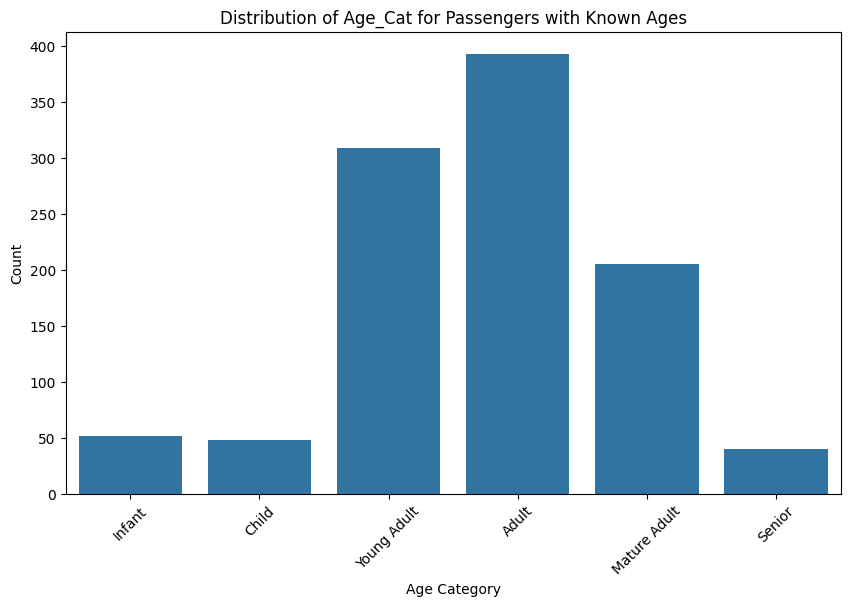

In [1025]:
# Step 1: Create Age_Cat with suggested categories based on survival rates.
def assign_age_category(age):
    if pd.isna(age):
        return np.nan
    elif age <= 4:  # Infant
        return 'Infant'
    elif age <= 13:  # Child
        return 'Child'
    elif age <= 24:  # Young Adult
        return 'Young Adult'
    elif age <= 39:  # Adult
        return 'Adult'
    elif age <= 59:  # Mature Adult
        return 'Mature Adult'
    else:  # Senior
        return 'Senior'

titanic_df['Age_Cat'] = titanic_df['Age'].apply(assign_age_category)

# Display the distribution of Age_Cat for passengers with known ages
print("\nDistribution of Age_Cat for Passengers with Known Ages:")
print(titanic_df[titanic_df['Age'].notna()]['Age_Cat'].value_counts())

# Plot distribution of Age_Cat for known ages
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Cat', data=titanic_df[titanic_df['Age'].notna()],
              order=['Infant', 'Child', 'Young Adult', 'Adult', 'Mature Adult', 'Senior'])
plt.title('Distribution of Age_Cat for Passengers with Known Ages')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


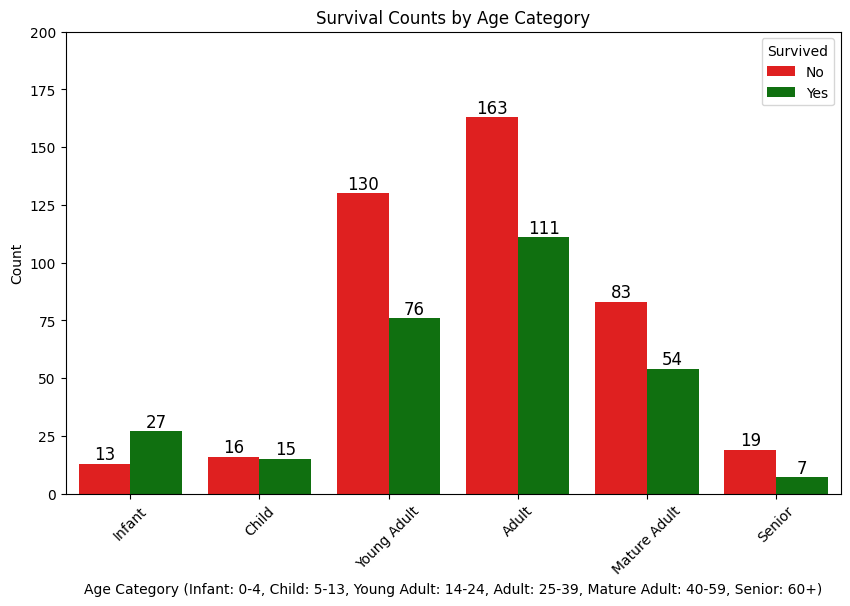

In [1026]:
# Bar chart for 'Age_Cat' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age_Cat', hue='Survived', data=titanic_df, palette={0: 'red', 1: 'green'},
              order=['Infant', 'Child', 'Young Adult', 'Adult', 'Mature Adult', 'Senior'])

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 4,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="black", fontsize=12)

plt.title('Survival Counts by Age Category')
plt.xlabel('Age Category (Infant: 0-4, Child: 5-13, Young Adult: 14-24, Adult: 25-39, Mature Adult: 40-59, Senior: 60+)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,201,step=25))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()

C3. Exploratory Analysis For Age_Cat Imputation

In [1027]:
# Standalone block for descriptive statistics of Mr and Miss > 18 years
print("\nDescriptive Statistics for Mr and Miss Passengers Over 18 Years:")

# Step 1: Extract or verify Title column
if 'Title' not in titanic_df.columns:
    # Extract titles from Name (common Titanic pattern)
    titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    # Map and clean titles
    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Dr', 'Rev': 'Rev', 'Col': 'Military', 'Major': 'Military',
        'Capt': 'Military', 'Don': 'Noble', 'Lady': 'Noble', 'Sir': 'Noble',
        'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'
    }
    titanic_df['Title'] = titanic_df['Title'].map(title_mapping).fillna('Other')
    print("\nTitles extracted and mapped from Name column:")
    print(titanic_df['Title'].value_counts())

# Step 2: Filter passengers over 18
df_adults = titanic_df[titanic_df['Age'].notna() & (titanic_df['Age'] > 18)].copy()

# Step 3: Categorize Mr and Miss
df_mr = df_adults[df_adults['Title'] == 'Mr']
df_miss = df_adults[df_adults['Title'] == 'Miss']

# Step 4: Compute descriptive statistics
print("\nDescriptive Statistics for Mr (Adult Males > 18):")
stats_mr = df_mr[['Age', 'Pclass', 'Fare', 'Survived']].describe()
print(stats_mr)

print("\nDescriptive Statistics for Miss (Adult Unmarried Females > 18):")
stats_miss = df_miss[['Age', 'Pclass', 'Fare', 'Survived']].describe()
print(stats_miss)

# Step 5: Additional categorization check (optional)
print("\nVerification of Categorization:")
print(f"Total Mr over 18: {len(df_mr)}")
print(f"Total Miss over 18: {len(df_miss)}")
print(f"Percentage of Miss who are over 18: {(len(df_miss) / len(df_adults[df_adults['Sex'] == 'female'])):.2%}")


Descriptive Statistics for Mr and Miss Passengers Over 18 Years:

Descriptive Statistics for Mr (Adult Males > 18):
              Age      Pclass        Fare    Survived
count  533.000000  533.000000  533.000000  363.000000
mean    33.648218    2.277674   27.500921    0.176309
std     12.016733    0.828197   47.022356    0.381608
min     18.500000    1.000000    0.000000    0.000000
25%     24.000000    2.000000    7.895800    0.000000
50%     30.000000    3.000000   11.500000    0.000000
75%     40.000000    3.000000   26.550000    0.000000
max     80.000000    3.000000  512.329200    1.000000

Descriptive Statistics for Miss (Adult Unmarried Females > 18):
              Age      Pclass        Fare   Survived
count  129.000000  129.000000  129.000000  85.000000
mean    29.073643    1.992248   59.863922   0.764706
std      8.933369    0.888258   82.992403   0.426700
min     18.500000    1.000000    6.950000   0.000000
25%     22.000000    1.000000    7.925000   1.000000
50%     27.000

In [1028]:
# Standalone block to analyze Miss passengers with age categories
print("\nAnalysis of Miss Passengers with Age Categories:")

# Step 1: Extract or verify Title column
if 'Title' not in titanic_df.columns:
    # Extract titles from Name
    titanic_df['Title'] = titanic_df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
    # Map and clean titles
    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Dr', 'Rev': 'Rev', 'Col': 'Military', 'Major': 'Military',
        'Capt': 'Military', 'Don': 'Noble', 'Lady': 'Noble', 'Sir': 'Noble',
        'Mlle': 'Miss', 'Ms': 'Miss', 'Mme': 'Mrs'
    }
    titanic_df['Title'] = titanic_df['Title'].map(title_mapping).fillna('Other')
    print("\nTitles extracted and mapped from Name column:")
    print(titanic_df['Title'].value_counts())

# Step 2: Filter for Miss passengers
df_miss = titanic_df[titanic_df['Title'] == 'Miss'].copy()

# Step 3: Handle missing ages (optional imputation)
# For now, we'll exclude missing ages; uncomment the next line to impute with median
# df_miss['Age'] = df_miss['Age'].fillna(df_miss['Age'].median())
df_miss = df_miss[df_miss['Age'].notna()]

# Step 4: Define age categories
bins = [0, 4, 13, 18, float('inf')]
labels = ['Infant (0-4)', 'Child (5-13)', 'Teen (14-18)', 'Adult (>18)']
df_miss['AgeCategory'] = pd.cut(df_miss['Age'], bins=bins, labels=labels, include_lowest=True)

# Step 5: Distribution of Miss passengers by age category
print("\nDistribution of Miss Passengers by Age Category:")
age_distribution = df_miss['AgeCategory'].value_counts().reindex(labels)
age_distribution_pct = (age_distribution / age_distribution.sum()) * 100
print(age_distribution)
print("\nPercentage Distribution:")
print(age_distribution_pct)

# Step 6: Descriptive statistics for each age category
print("\nDescriptive Statistics by Age Category for Miss Passengers:")
for category in labels:
    print(f"\n{category}:")
    stats = df_miss[df_miss['AgeCategory'] == category][['Age', 'Pclass', 'Fare', 'Survived']].describe()
    print(stats)

# Step 7: Validation of >50% being 18 or younger
total_miss = len(df_miss)
miss_18_or_younger = len(df_miss[df_miss['Age'] <= 18])
percentage_18_or_younger = (miss_18_or_younger / total_miss) * 100
print(f"\nValidation Check:")
print(f"Total Miss passengers (with age): {total_miss}")
print(f"Miss passengers 18 or younger: {miss_18_or_younger}")
print(f"Percentage of Miss passengers 18 or younger: {percentage_18_or_younger:.2f}%")


Analysis of Miss Passengers with Age Categories:

Distribution of Miss Passengers by Age Category:
AgeCategory
Infant (0-4)     24
Child (5-13)     22
Teen (14-18)     35
Adult (>18)     129
Name: count, dtype: int64

Percentage Distribution:
AgeCategory
Infant (0-4)    11.428571
Child (5-13)    10.476190
Teen (14-18)    16.666667
Adult (>18)     61.428571
Name: count, dtype: float64

Descriptive Statistics by Age Category for Miss Passengers:

Infant (0-4):
             Age     Pclass        Fare   Survived
count  24.000000  24.000000   24.000000  17.000000
mean    2.107917   2.666667   27.268229   0.705882
std     1.239930   0.564660   28.008830   0.469668
min     0.170000   1.000000   10.462500   0.000000
25%     1.000000   2.000000   15.250025   0.000000
50%     2.000000   3.000000   20.393750   1.000000
75%     3.000000   3.000000   27.787500   1.000000
max     4.000000   3.000000  151.550000   1.000000

Child (5-13):
             Age     Pclass       Fare   Survived
count  22.00


Descriptive Statistics for Single Travelers (FamilySize = 0, Miss/Mr >18):
                          count       mean        std   min    25%    50%  \
Title    Pclass Survived                                                    
Col      1      0.0         1.0  60.000000        NaN  60.0  60.00  60.00   
                1.0         1.0  56.000000        NaN  56.0  56.00  56.00   
Countess 1      1.0         1.0  33.000000        NaN  33.0  33.00  33.00   
Don      1      0.0         1.0  40.000000        NaN  40.0  40.00  40.00   
Dr       1      0.0         0.0        NaN        NaN   NaN    NaN    NaN   
                1.0         2.0  40.500000  12.020815  32.0  36.25  40.50   
         2      0.0         2.0  38.500000  21.920310  23.0  30.75  38.50   
Jonkheer 1      0.0         1.0  38.000000        NaN  38.0  38.00  38.00   
Major    1      0.0         1.0  45.000000        NaN  45.0  45.00  45.00   
                1.0         1.0  52.000000        NaN  52.0  52.00  52.00   


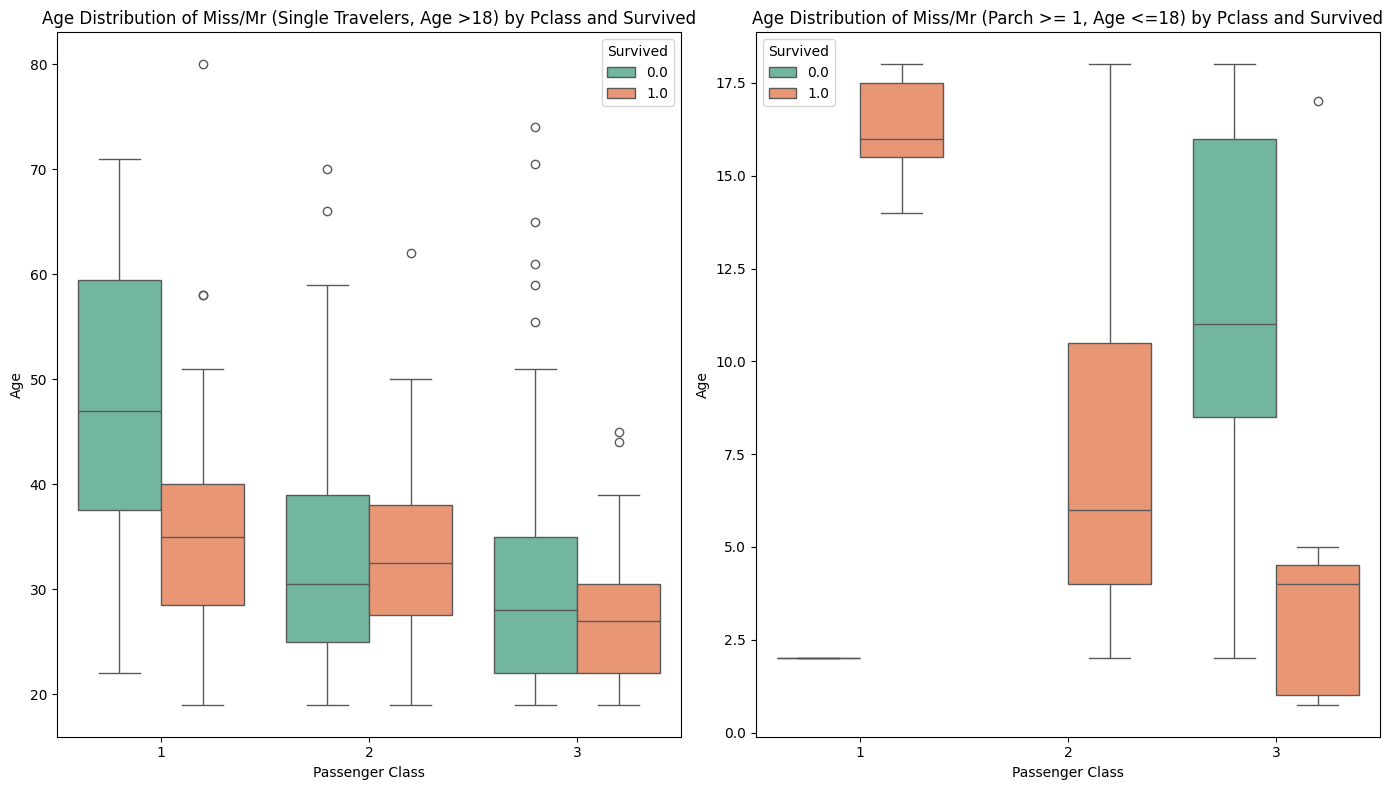


Number of Mr passengers <=18: 48

Sample of Mr passengers <=18:
     PassengerId Title   Age  Pclass  Survived  Parch  SibSp  FamilySize
86            87    Mr  16.0       3       0.0      3      1           4
138          139    Mr  16.0       3       0.0      0      0           0
144          145    Mr  18.0       2       0.0      0      0           0
163          164    Mr  17.0       3       0.0      0      0           0
175          176    Mr  18.0       3       0.0      1      1           2


In [1029]:
# Step 1: Descriptive Statistics for FamilySize = 0 (Single Travelers, >18 for Miss and Mr)
single_travelers = titanic_df[titanic_df['FamilySize'] == 0].copy()
single_travelers_filtered = single_travelers[
    ((single_travelers['Title'].isin(['Miss', 'Mr'])) & (single_travelers['Age'] > 18)) |
    (~single_travelers['Title'].isin(['Miss', 'Mr']))
].copy()

print("\nDescriptive Statistics for Single Travelers (FamilySize = 0, Miss/Mr >18):")
single_stats = single_travelers_filtered.groupby(['Title', 'Pclass', 'Survived'])['Age'].describe()
print(single_stats)

# Step 2: Descriptive Statistics for Child Relationships (Parch >= 1, <=18 for Miss and Mr)
child_relationships = titanic_df[titanic_df['Parch'] >= 1].copy()
child_relationships_filtered = child_relationships[
    ((child_relationships['Title'].isin(['Miss', 'Mr'])) & (child_relationships['Age'] <= 18)) |
    (~child_relationships['Title'].isin(['Miss', 'Mr']))
].copy()

print("\nDescriptive Statistics for Child Relationships (Parch >= 1, Miss/Mr <=18):")
child_stats = child_relationships_filtered.groupby(['Title', 'Pclass', 'Survived'])['Age'].describe()
print(child_stats)

# Step 3: Visualize Distributions with Boxplots
plt.figure(figsize=(14, 8))

# Boxplot for Single Travelers
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', hue='Survived',
            data=single_travelers_filtered[single_travelers_filtered['Title'].isin(['Miss', 'Mr'])],
            palette='Set2')
plt.title('Age Distribution of Miss/Mr (Single Travelers, Age >18) by Pclass and Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

# Boxplot for Child Relationships
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Age', hue='Survived',
            data=child_relationships_filtered[child_relationships_filtered['Title'].isin(['Miss', 'Mr'])],
            palette='Set2')
plt.title('Age Distribution of Miss/Mr (Parch >= 1, Age <=18) by Pclass and Survived')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

plt.tight_layout()
plt.show()

# Step 4: Count of Mr <=18 to Confirm
mr_under_18 = titanic_df[(titanic_df['Title'] == 'Mr') & (titanic_df['Age'] <= 18) & (titanic_df['Age'].notna())]
print(f"\nNumber of Mr passengers <=18: {len(mr_under_18)}")
print("\nSample of Mr passengers <=18:")
print(mr_under_18[['PassengerId', 'Title', 'Age', 'Pclass', 'Survived', 'Parch', 'SibSp', 'FamilySize']].head())

C4. Age & Age_Cat Variable Imputation (Needs More Work)

In [1030]:
# Step 1: Define new age categories and mapping function
def map_age_to_category(age):
    if pd.isna(age):
        return None
    try:
        age = float(age)  # Ensure age is a float
    except (TypeError, ValueError) as e:
        print(f"Error converting age to float: {age} (type: {type(age)}). Setting to NaN.")
        return None
    if 0 <= age <= 4:
        return 'Infant'
    elif 5 <= age <= 13:
        return 'Child'
    elif 14 <= age <= 25:
        return 'Young Adult'
    elif 26 <= age <= 39:
        return 'Adult'
    elif 40 <= age <= 59:
        return 'Mature Adult'
    else:
        return 'Senior'

# Step 2: Impute Age_Cat for the missing Dr passenger
def impute_age_category(df):
    try:
        df_copy = df.copy()
    except NameError:
        raise NameError("Error: 'titanic_df' is not defined. Please ensure the dataset is loaded.")

    # Verify required columns
    required_columns = ['Age', 'Pclass', 'Survived', 'Title', 'FamilySize', 'SibSp', 'Parch', 'FamilyID', 'PassengerId']
    missing_columns = [col for col in required_columns if col not in df_copy.columns]
    if missing_columns:
        raise KeyError(f"Error: Missing required columns in dataset: {missing_columns}")

    # Ensure columns have correct types
    try:
        if 'Age' in df_copy.columns:
            df_copy['Age'] = pd.to_numeric(df_copy['Age'], errors='coerce')
        if 'Pclass' in df_copy.columns:
            df_copy['Pclass'] = pd.to_numeric(df_copy['Pclass'], errors='coerce', downcast='integer')
        if 'Survived' in df_copy.columns:
            df_copy['Survived'] = pd.to_numeric(df_copy['Survived'], errors='coerce')
    except Exception as e:
        raise ValueError(f"Error converting column types: {str(e)}")

    if 'Age_Cat' not in df_copy.columns:
        df_copy['Age_Cat'] = None

    # Check for Dr passengers with missing ages
    dr_missing_age = df_copy[(df_copy['Title'] == 'Dr') & (df_copy['Age'].isna())]
    if len(dr_missing_age) != 1:
        print(f"Warning: Expected exactly 1 Dr passenger with missing age, but found {len(dr_missing_age)}.")
        if len(dr_missing_age) == 0:
            print("No imputation needed.")
            return df_copy

    # Group by FamilyID to leverage family relationships
    try:
        family_groups = df_copy.groupby('FamilyID')
    except KeyError as e:
        raise KeyError(f"Error with FamilyID grouping: {str(e)}")

    for family_id, group in family_groups:
        # Identify roles in the family
        dr = group[group['Title'] == 'Dr']
       
        # FamilySize = 0 (Single Travelers, >18)
        if group['FamilySize'].iloc[0] == 0:
            for idx in group.index:
                if pd.isna(df_copy.loc[idx, 'Age_Cat']):
                    title = df_copy.loc[idx, 'Title']
                    # Only impute if Age is missing
                    if pd.isna(df_copy.loc[idx, 'Age']):
                        if title == 'Dr':
                            # Directly impute 46 for the missing Dr passenger
                            df_copy.loc[idx, 'Age'] = 46.0
                            print(f"Imputed Age = 46.0 for Dr passenger at index {idx}")
                    # Set Age_Cat based on Age (whether imputed or existing)
                    df_copy.loc[idx, 'Age_Cat'] = map_age_to_category(df_copy.loc[idx, 'Age'])
       
        # FamilySize > 0 (Parent-Child or Sibling/Spouse)
        else:
            # Identify parents (Mr, Mrs, Dr with Parch > 0)
            parents = group[(group['Title'].isin(['Mr', 'Mrs', 'Dr'])) & (group['Parch'] > 0)]
           
            # Impute parents' Age_Cat
            if not parents.empty:
                for parent_idx in parents.index:
                    if pd.isna(df_copy.loc[parent_idx, 'Age_Cat']):
                        if pd.isna(df_copy.loc[parent_idx, 'Age']):
                            title = df_copy.loc[parent_idx, 'Title']
                            if title == 'Dr':
                                # Directly impute 46 for the missing Dr passenger
                                df_copy.loc[parent_idx, 'Age'] = 46.0
                                print(f"Imputed Age = 46.0 for Dr passenger at index {parent_idx}")
                        df_copy.loc[parent_idx, 'Age_Cat'] = map_age_to_category(df_copy.loc[parent_idx, 'Age'])
           
            # Handle siblings within the family (SibSp > 0)
            if group['SibSp'].max() > 0:
                for idx1 in group.index:
                    if pd.isna(df_copy.loc[idx1, 'Age_Cat']):
                        if pd.isna(df_copy.loc[idx1, 'Age']):
                            title = df_copy.loc[idx1, 'Title']
                            if title == 'Dr':
                                # Directly impute 46 for the missing Dr passenger
                                df_copy.loc[idx1, 'Age'] = 46.0
                                print(f"Imputed Age = 46.0 for Dr passenger at index {idx1}")
                        df_copy.loc[idx1, 'Age_Cat'] = map_age_to_category(df_copy.loc[idx1, 'Age'])
   
    # Final fallback for any remaining missing Age_Cat
    for idx in df_copy.index:
        if pd.isna(df_copy.loc[idx, 'Age_Cat']):
            if pd.isna(df_copy.loc[idx, 'Age']):
                title = df_copy.loc[idx, 'Title']
                if title == 'Dr':
                    # Directly impute 46 for the missing Dr passenger
                    df_copy.loc[idx, 'Age'] = 46.0
                    print(f"Imputed Age = 46.0 for Dr passenger at index {idx}")
            df_copy.loc[idx, 'Age_Cat'] = map_age_to_category(df_copy.loc[idx, 'Age'])
   
    return df_copy

# Apply imputation
try:
    titanic_imputed = impute_age_category(titanic_df)
except Exception as e:
    print(f"Error during imputation: {str(e)}")
    raise

# Step 3: Display the imputed Dr passenger with previously missing age
print("\nImputed Dr Passenger with Previously Missing Age:")
missing_age_ids_dr = titanic_df[(titanic_df['Title'] == 'Dr') & (titanic_df['Age'].isna())]['PassengerId']
sample_imputed_dr = titanic_imputed[titanic_imputed['PassengerId'].isin(missing_age_ids_dr)][['PassengerId', 'Title', 'Age', 'Age_Cat', 'Pclass', 'Survived', 'FamilySize', 'SibSp', 'Parch', 'FamilyID']]
if not sample_imputed_dr.empty:
    print(sample_imputed_dr)
else:
    print("Note: No previously missing ages found for Dr passengers after imputation.")

# Step 4: Display all Dr passengers to confirm existing ages are unchanged
print("\nAll Dr Passengers After Imputation (to Confirm Existing Ages Unchanged):")
all_dr_passengers = titanic_imputed[titanic_imputed['Title'] == 'Dr'][['PassengerId', 'Title', 'Age', 'Age_Cat', 'Pclass', 'Survived', 'FamilySize', 'SibSp', 'Parch', 'FamilyID']]
print(all_dr_passengers)

Imputed Age = 46.0 for Dr passenger at index 766

Imputed Dr Passenger with Previously Missing Age:
     PassengerId Title   Age       Age_Cat  Pclass  Survived  FamilySize  \
766          767    Dr  46.0  Mature Adult       1       0.0           0   

     SibSp  Parch      FamilyID  
766      0      0  Brewe_112379  

All Dr Passengers After Imputation (to Confirm Existing Ages Unchanged):
      PassengerId Title   Age       Age_Cat  Pclass  Survived  FamilySize  \
245           246    Dr  44.0  Mature Adult       1       0.0           2   
317           318    Dr  54.0  Mature Adult       2       0.0           0   
398           399    Dr  23.0   Young Adult       2       0.0           0   
632           633    Dr  32.0         Adult       1       1.0           0   
660           661    Dr  50.0  Mature Adult       1       1.0           2   
766           767    Dr  46.0  Mature Adult       1       0.0           0   
796           797    Dr  49.0  Mature Adult       1       1.0     

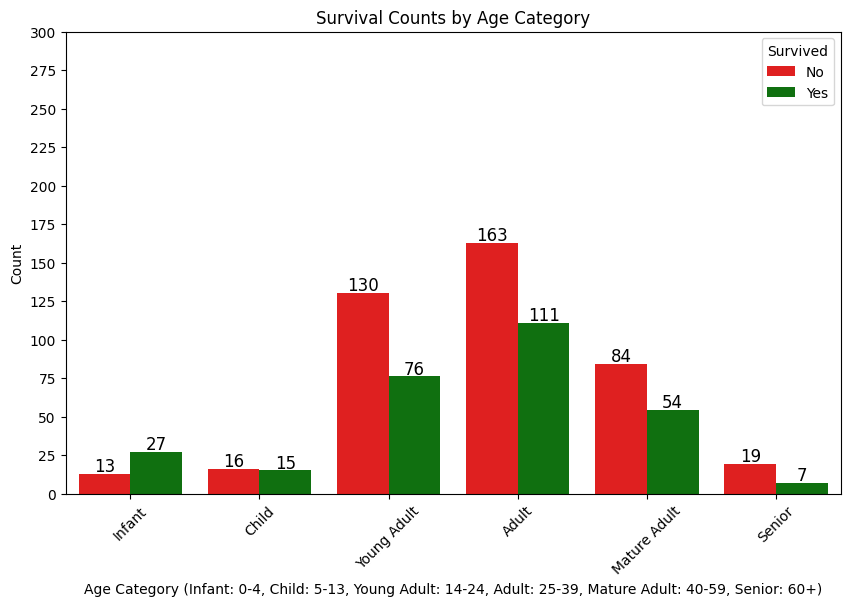

In [1031]:
# Bar chart for 'Age_Cat' distribution with counts of Survived (0 and 1) for the training dataset.
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Age_Cat', hue='Survived', data=titanic_imputed, palette={0: 'red', 1: 'green'},
              order=['Infant', 'Child', 'Young Adult', 'Adult', 'Mature Adult', 'Senior'])

# Add numeric values centered inside each bar with white font
for p in ax.patches:
    height = p.get_height()
    # Only add text if height is greater than 0 to avoid the "0" label
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 5,  # Center vertically
                int(height),  # Convert to integer for clean display
                ha="center", va="center", color="black", fontsize=12)

plt.title('Survival Counts by Age Category')
plt.xlabel('Age Category (Infant: 0-4, Child: 5-13, Young Adult: 14-24, Adult: 25-39, Mature Adult: 40-59, Senior: 60+)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.yticks(np.arange(0,301,step=25))
plt.legend(title='Survived', labels=['No', 'Yes'])  # Customize legend labels
plt.show()